In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import csv
import numpy as np
import math 
#from sklearn.manifold import TSNE
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
import pickle
from scipy import stats
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# code for different time domain feature extraction techniques

def int_emg(sensor_data):
    summ = 0
    for val in sensor_data:
        summ = summ + abs(val)
        
    pattern = summ
    return pattern
    

def mav(sensor_data):
    #print(sensor_data)
    #print('------------------------------------------------------------')
    abs_sensor_data = []
    for val in sensor_data:
        abs_sensor_data.append(abs(val))
        
    #print(abs_sensor_data)
    #print('------------------------------------------------------------')
    #summation = sum(abs_sensor_data)  
    feature = np.mean(abs_sensor_data)
    return feature


def mav1(sensor_data):
    weighted_abs_sensor_data = []
    for i in range(len(sensor_data)):
        #print(sensor_data[i])
        if 0.25*len(sensor_data)<=i<=0.75*len(sensor_data):
            weighted_abs_sensor_data.append(abs(sensor_data[i]))
        
        else:
            weighted_abs_sensor_data.append(0.5*abs(sensor_data[i]))
    
    #print(weighted_abs_sensor_data)
    feature = np.mean(weighted_abs_sensor_data)
    return feature   

def variance(sensor_data):
    summ = 0
    for val in sensor_data:
        summ = summ + math.pow(val, 2)
         
    #print(summ)
    feature = summ/(len(sensor_data)-1)   
    return feature

def rms(sensor_data):
    summ = 0
    for val in sensor_data:
        summ = summ + math.pow(val, 2)
    
    feature = math.sqrt(summ/len(sensor_data)) 
    return feature

def waveform_length(sensor_data):
    sum = 0
    for i in range(len(sensor_data)-1):
        sum = sum + abs(sensor_data[i+1]-sensor_data[i])
        
    feature = sum    
    return feature

def avg_amp_change(sensor_data):
    sum = 0
    for i in range(len(sensor_data)-1):
        sum = sum + abs(sensor_data[i+1]-sensor_data[i])
        
    feature = sum/len(sensor_data)    
    return feature

def diff_abs_std_dev_val(sensor_data):
    sum = 0
    for i in range(len(sensor_data)-1):
        sum = sum + math.pow((sensor_data[i+1]-sensor_data[i]), 2)
        
    mean = sum/(len(sensor_data)-1)
    feature = math.sqrt(mean)
    return feature

In [3]:
def data_preprocessing(data, label):

    counter = 1
    reading = []
    class_reading = []
    for row in data.itertuples():
        if counter == 9:
            counter = 1
            reading.append(label)
            class_reading.append(reading)
            reading = []
        sensor = []
        for i in row:
            sensor.append(i)
            sensor_data = sensor[1:len(sensor)]
        feature = int_emg(sensor_data)
        #feature = mav(sensor_data)
        #feature = mav1(sensor_data)
        #feature = variance(sensor_data)
        #feature = rms(sensor_data)
        #feature = waveform_length(sensor_data)
        #feature = avg_amp_change(sensor_data)
        #feature = diff_abs_std_dev_val(sensor_data)
        reading.append(feature)
        counter = counter + 1
    reading.append(label)
    class_reading.append(reading)
    return class_reading
    #return sensor_data

In [4]:
data = pd.read_csv('/home/hp/Myo_dataset/1.csv', header=None )

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 0
processed_reading0 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading0)
print('----------------------------------------------------')
print(len(processed_reading0))

#sensor_data = data_preprocessing(data, label)
#print(len(sensor_data))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[22828, 36413, 19859, 60915, 43602, 15211, 33836, 38948, 0], [25758, 30457, 21242, 58795, 40965, 14884, 39335, 50589, 0], [29666, 40268, 16023, 71131, 52583, 19143, 42997, 59439, 0], [35822, 54787, 19511, 66457, 50058, 17131, 39885, 51174, 0], [23042, 31889, 14922, 54808, 41493, 14287, 30555, 34781, 0], [32515, 50604, 28398, 61755, 47511, 18559, 45930, 58142, 0], [22989, 34362, 13748, 54554, 40332, 14417, 32842, 33172, 0], [28723, 44265, 17968, 64143, 46512, 16768, 36270, 43045, 0], [31995, 46218, 23374, 63753, 46269, 17979, 46515, 55126, 0], [33938, 50956, 20026, 60846, 46207, 17777, 39443, 50236, 0], [26679, 39285, 20237, 55366, 38967, 14205, 36518, 46405, 0], [18573, 26301, 12097, 45278, 30386, 11365, 28384, 32145, 0], [22873, 34520, 15908, 52475, 36990, 14236, 33490, 36402, 0], [21192, 30284, 19441, 48603, 33712, 12101, 31667, 36131, 

In [5]:
data = pd.read_csv('/home/hp/Myo_dataset/2.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 1
processed_reading1 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading1)
print('----------------------------------------------------')
print(len(processed_reading1))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[2330, 3937, 14181, 12416, 4298, 3216, 4114, 2022, 1], [2213, 4250, 12425, 10112, 4601, 3191, 3684, 2118, 1], [2453, 5098, 15678, 14888, 5030, 3339, 3875, 2044, 1], [2156, 3646, 12118, 12145, 4581, 3195, 3523, 1976, 1], [2046, 3490, 12055, 12604, 4548, 3028, 3540, 2059, 1], [2360, 3941, 13857, 15780, 4861, 3459, 4216, 2088, 1], [2089, 3303, 10884, 12431, 4711, 3073, 3577, 2011, 1], [1978, 2875, 9155, 10803, 4325, 2844, 2499, 1902, 1], [1926, 2648, 8049, 9919, 4270, 2941, 3110, 1939, 1], [2040, 3132, 10809, 14064, 4482, 2942, 3382, 1882, 1], [1991, 2638, 7683, 10715, 4431, 2914, 2313, 1842, 1], [1992, 3035, 9794, 11292, 4378, 2898, 2599, 1961, 1], [2023, 2642, 7546, 9777, 4308, 2821, 2260, 1855, 1], [2148, 3432, 11081, 14302, 5032, 4599, 2659, 2051, 1], [2067, 3085, 11715, 11940, 4290, 4143, 2630, 1979, 1], [2139, 3064, 10782, 13932, 4582,

In [6]:
data = pd.read_csv('/home/hp/Myo_dataset/3.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 2
processed_reading2 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading2)
print('----------------------------------------------------')
print(len(processed_reading2))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[61237.0, 13398.0, 7635.0, 7244.0, 8542.0, 20393.0, 23608.0, 57755.0, 2], [67687.0, 12560.0, 8953.0, 7836.0, 9396.0, 26119.0, 28781.0, 61463.0, 2], [59391.0, 10898.0, 10023.0, 7684.0, 8232.0, 24149.0, 27590.0, 53961.0, 2], [50302.0, 8990.0, 8469.0, 6876.0, 5874.0, 13317.0, 16164.0, 42091.0, 2], [51080.0, 10389.0, 8744.0, 6628.0, 6812.0, 16973.0, 20204.0, 44466.0, 2], [38068.0, 6754.0, 4534.0, 4723.0, 4421.0, 10236.0, 12400.0, 30741.0, 2], [48965.0, 9236.0, 8327.0, 5950.0, 5939.0, 14292.0, 18695.0, 47438.0, 2], [35339.0, 6695.0, 5609.0, 5075.0, 4851.0, 12674.0, 16019.0, 31236.0, 2], [21135.0, 4750.0, 3694.0, 4769.0, 4345.0, 11103.0, 13212.0, 15472.0, 2], [26893.0, 5210.0, 4115.0, 4467.0, 4580.0, 12261.0, 15052.0, 19557.0, 2], [65669.0, 12403.0, 8086.0, 8316.0, 10503.0, 31708.0, 35521.0, 59900.0, 2], [76373.0, 15738.0, 7816.0, 9366.0, 10720

In [7]:
data = pd.read_csv('/home/hp/Myo_dataset/4.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 3
processed_reading3 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading3)
print('----------------------------------------------------')
print(len(processed_reading3))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[9899, 24825, 75797, 74473, 31979, 10488, 7514, 7800, 3], [9949, 23111, 77250, 78081, 33438, 11267, 8150, 7376, 3], [8983, 28212, 76964, 77192, 34269, 10950, 7781, 7015, 3], [6838, 19646, 57547, 53536, 24972, 7992, 5675, 4969, 3], [9501, 33655, 79640, 81044, 48864, 16049, 9029, 7315, 3], [7034, 21205, 58051, 61669, 28460, 9202, 6342, 5597, 3], [8230, 27659, 63219, 68102, 34886, 11372, 7717, 6406, 3], [11991, 34107, 80128, 72532, 29364, 11014, 8798, 8400, 3], [9896, 29138, 71297, 68035, 28580, 10207, 7958, 7764, 3], [8351, 25403, 71769, 73483, 34757, 11113, 7812, 7674, 3], [7696, 20651, 66508, 62747, 28676, 9747, 7206, 6386, 3], [6551, 24525, 60943, 66865, 34467, 10233, 6168, 5016, 3], [9090, 28004, 76520, 77848, 34635, 11007, 7464, 6640, 3], [6299, 24489, 54969, 59375, 29309, 9001, 5677, 4630, 3], [8235, 18937, 69340, 69720, 27828, 9420, 

In [8]:
data = pd.read_csv('/home/hp/Myo_dataset/5.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 4
processed_reading4 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading4)
print('----------------------------------------------------')
print(len(processed_reading4))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[21942, 11004, 37200, 38293, 8867, 6688, 11801, 20363, 4], [27711, 10793, 37633, 43478, 11092, 6987, 14696, 21713, 4], [22932, 10840, 34051, 28582, 7859, 4773, 8919, 19227, 4], [24752, 12794, 46850, 34657, 8890, 6474, 9495, 20168, 4], [25949, 11751, 39160, 34909, 8852, 6926, 23639, 20431, 4], [22505, 11363, 33893, 39027, 10573, 5947, 9612, 16428, 4], [21073, 12204, 38778, 30261, 7664, 5259, 8835, 18837, 4], [25880, 15077, 39868, 33552, 8389, 4830, 7072, 19373, 4], [6477, 6048, 23202, 21091, 5585, 6981, 12440, 5513, 4], [8094, 5537, 22344, 16182, 4740, 3791, 5743, 6521, 4], [16068, 11561, 30175, 25440, 6694, 4392, 6765, 13426, 4], [14035, 8006, 29603, 28384, 7583, 5974, 9990, 12588, 4], [10433, 6729, 25563, 20318, 6009, 6190, 11581, 8941, 4], [16340, 9698, 26115, 24516, 6513, 6071, 10184, 14446, 4], [8333, 7633, 29102, 25141, 6081, 7084, 1

In [9]:
data = pd.read_csv('/home/hp/Myo_dataset/6.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 5
processed_reading5 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading5)
print('----------------------------------------------------')
print(len(processed_reading5))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[10030, 7585, 14390, 33818, 9163, 7909, 36952, 50208, 5], [8092, 8272, 12625, 18797, 6265, 6837, 31411, 42176, 5], [9670, 9519, 13671, 30558, 7858, 7358, 33526, 44991, 5], [8268, 8235, 10635, 21186, 6838, 7769, 28098, 38837, 5], [8784, 8707, 13457, 30395, 8011, 7672, 31827, 41463, 5], [10882, 11472, 16999, 37639, 10002, 8658, 37760, 47168, 5], [8362, 8306, 10828, 23514, 6180, 6346, 29427, 39079, 5], [8537, 9122, 13415, 28997, 6871, 6782, 30793, 41122, 5], [5650, 7627, 7906, 11137, 4229, 4455, 19328, 25212, 5], [9285, 8518, 14509, 30530, 7695, 7297, 32464, 43572, 5], [9861, 10186, 15771, 32294, 8088, 8391, 36930, 45217, 5], [8416, 8265, 14028, 29146, 6788, 7135, 33090, 42666, 5], [13032, 8425, 30882, 23653, 5782, 5370, 8691, 13211, 5], [12417, 8096, 32051, 32778, 7716, 7041, 11911, 12827, 5], [7589, 7029, 30249, 27078, 6855, 9555, 17982, 7

In [10]:
data = pd.read_csv('/home/hp/Myo_dataset/7.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 6
processed_reading6 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading6)
print('----------------------------------------------------')
print(len(processed_reading6))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[4401, 13008, 25924, 23806, 20084, 6438, 5263, 3610, 6], [3299, 8296, 23434, 19801, 17028, 5564, 4086, 2982, 6], [3176, 7624, 21572, 16684, 15391, 5190, 5218, 3088, 6], [3587, 8982, 24554, 21090, 17621, 5873, 4527, 3328, 6], [4647, 13238, 28324, 23225, 16188, 6547, 9261, 10653, 6], [4234, 9282, 26909, 25502, 19635, 6845, 6061, 4446, 6], [4264, 11373, 25503, 29934, 21182, 7371, 5634, 3801, 6], [3317, 7726, 23694, 23973, 19408, 6103, 4427, 3096, 6], [4250, 8991, 30504, 27440, 20991, 7116, 6308, 4117, 6], [6662, 14345, 34634, 29350, 21169, 7663, 11123, 11718, 6], [5237, 11148, 28069, 28398, 23135, 7448, 6663, 5295, 6], [6935, 16245, 46273, 33633, 25656, 9445, 10960, 5501, 6], [5672, 11368, 33772, 32242, 23863, 8059, 14227, 8080, 6], [4721, 10401, 28031, 22185, 17900, 6473, 5828, 3686, 6], [7641, 15150, 40465, 34959, 19219, 7181, 6795, 5062, 

In [11]:
data = pd.read_csv('/home/hp/Myo_dataset/8.csv', header=None)

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')

label = 7
processed_reading7 = data_preprocessing(data, label)
print('----------------------------------------------------')
print(processed_reading7)
print('----------------------------------------------------')
print(len(processed_reading7))

Number of Rows: 400
Number of Columns: 100
----------------------------------------------------
----------------------------------------------------
[[14331, 45695, 49322, 41899, 28618, 8989, 13833, 16655, 7], [15034, 44963, 64288, 34483, 24672, 8178, 9059, 8377, 7], [15489, 44320, 52711, 33818, 24356, 8349, 13702, 15900, 7], [15428, 43573, 55025, 45594, 33163, 10169, 10993, 15265, 7], [13959, 45653, 55726, 33008, 25506, 7682, 11054, 14349, 7], [15740, 33107, 51964, 19182, 13878, 6105, 17261, 20319, 7], [16373, 36359, 44942, 18414, 13440, 6508, 19372, 20548, 7], [17703, 42647, 54645, 27254, 19036, 7891, 16967, 21716, 7], [13669, 26535, 49698, 17085, 11578, 6061, 19696, 22439, 7], [25319, 48155, 56690, 35008, 25705, 11718, 24228, 27868, 7], [20424, 43057, 60345, 28684, 17827, 8148, 21461, 23673, 7], [16735, 40534, 52237, 31481, 24090, 8093, 14461, 18518, 7], [23961, 49609, 54870, 24842, 17129, 7890, 22825, 27394, 7], [19745, 47556, 58063, 34848, 24766, 8866, 16587, 20471, 7], [25121, 49

In [12]:
final_processed_reading = list(processed_reading0)

final_processed_reading.extend(processed_reading1)

final_processed_reading.extend(processed_reading2)

final_processed_reading.extend(processed_reading3)

final_processed_reading.extend(processed_reading4)

final_processed_reading.extend(processed_reading5)

final_processed_reading.extend(processed_reading6)

final_processed_reading.extend(processed_reading7)

#for row in final_processed_reading:
    #del row[7]

print(final_processed_reading)
print('----------------------------------------------------')
print(len(final_processed_reading))
print('----------------------------------------------------')

[[22828, 36413, 19859, 60915, 43602, 15211, 33836, 38948, 0], [25758, 30457, 21242, 58795, 40965, 14884, 39335, 50589, 0], [29666, 40268, 16023, 71131, 52583, 19143, 42997, 59439, 0], [35822, 54787, 19511, 66457, 50058, 17131, 39885, 51174, 0], [23042, 31889, 14922, 54808, 41493, 14287, 30555, 34781, 0], [32515, 50604, 28398, 61755, 47511, 18559, 45930, 58142, 0], [22989, 34362, 13748, 54554, 40332, 14417, 32842, 33172, 0], [28723, 44265, 17968, 64143, 46512, 16768, 36270, 43045, 0], [31995, 46218, 23374, 63753, 46269, 17979, 46515, 55126, 0], [33938, 50956, 20026, 60846, 46207, 17777, 39443, 50236, 0], [26679, 39285, 20237, 55366, 38967, 14205, 36518, 46405, 0], [18573, 26301, 12097, 45278, 30386, 11365, 28384, 32145, 0], [22873, 34520, 15908, 52475, 36990, 14236, 33490, 36402, 0], [21192, 30284, 19441, 48603, 33712, 12101, 31667, 36131, 0], [21184, 27943, 15604, 55868, 39895, 14302, 31024, 33907, 0], [22417, 29398, 17469, 52453, 36887, 13287, 34993, 41137, 0], [18892, 26451, 12124, 5

In [13]:
np.where(np.isnan(final_processed_reading))

(array([], dtype=int64), array([], dtype=int64))

In [14]:
with open("/home/hp/Myo_dataset/final_iemg.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(final_processed_reading)

In [15]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [15]:
data_final = pd.read_csv('/home/hp/Myo_dataset/final_iemg.csv', header=None)
#data_final = pd.read_csv('final_diff_abs_std_dev_val.csv', header=None)
total_rows=len(data_final.axes[0])
total_cols=len(data_final.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print('----------------------------------------------------')
print(data_final.iloc[0, :])

Number of Rows: 400
Number of Columns: 9
----------------------------------------------------
0    22828.0
1    36413.0
2    19859.0
3    60915.0
4    43602.0
5    15211.0
6    33836.0
7    38948.0
8        0.0
Name: 0, dtype: float64


In [17]:
## IEMG features ##

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

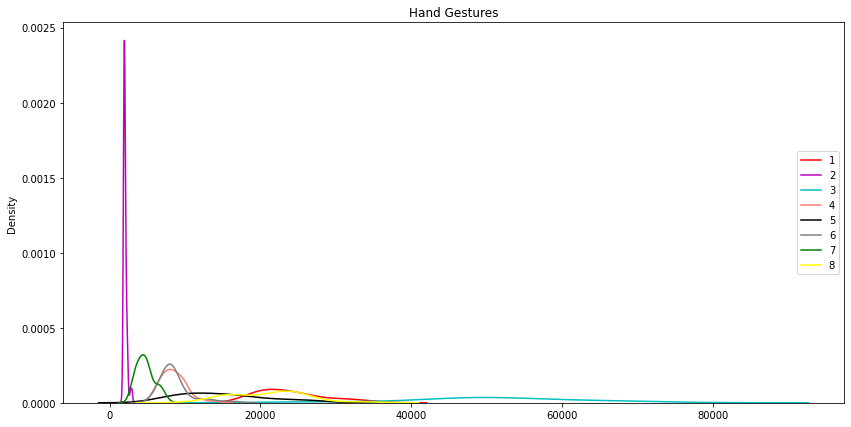

In [16]:
#univariate analysis of sensor data

#df1 = train[train['Activity']==1]
d_1 = data_final[data_final.iloc[:,8]==0]
#print(d_1)
#print('----------------------------------------------------------------')
d_2 = data_final[data_final.iloc[:,8]==1]
#print(d_2)
#print('----------------------------------------------------------------')
d_3 = data_final[data_final.iloc[:,8]==2]
#print(d_3)
#print('----------------------------------------------------------------')
d_4 = data_final[data_final.iloc[:,8]==3]
#print(d_4)
#print('----------------------------------------------------------------')
d_5 = data_final[data_final.iloc[:,8]==4]
#print(d_5)
#print('----------------------------------------------------------------')
d_6 = data_final[data_final.iloc[:,8]==5]
#print(d_6)
#print('----------------------------------------------------------------')
d_7 = data_final[data_final.iloc[:,8]==6]
#print(d_7)
#print('----------------------------------------------------------------')
d_8 = data_final[data_final.iloc[:,8]==7]
#print(d_8)
#print('----------------------------------------------------------------')
#print(list(d_1.iloc[:,0]))
#print('----------------------------------------------------------------')      
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,0]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,0]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,0]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,0]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,0]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,0]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,0]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,0]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

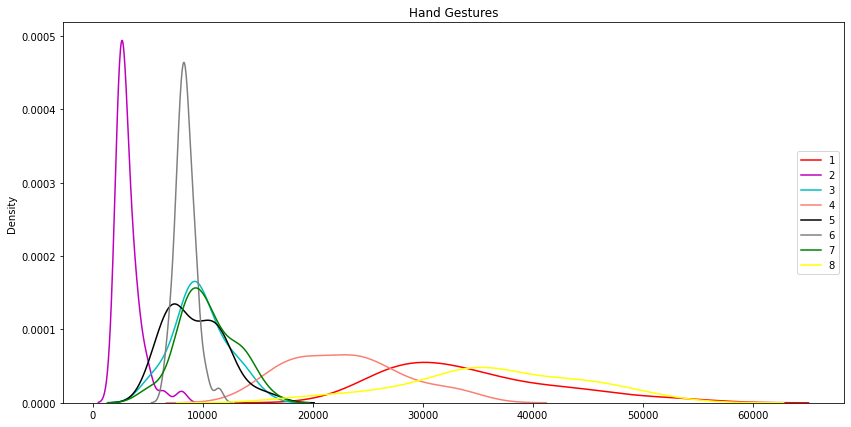

In [17]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,1]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,1]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,1]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,1]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,1]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,1]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,1]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,1]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

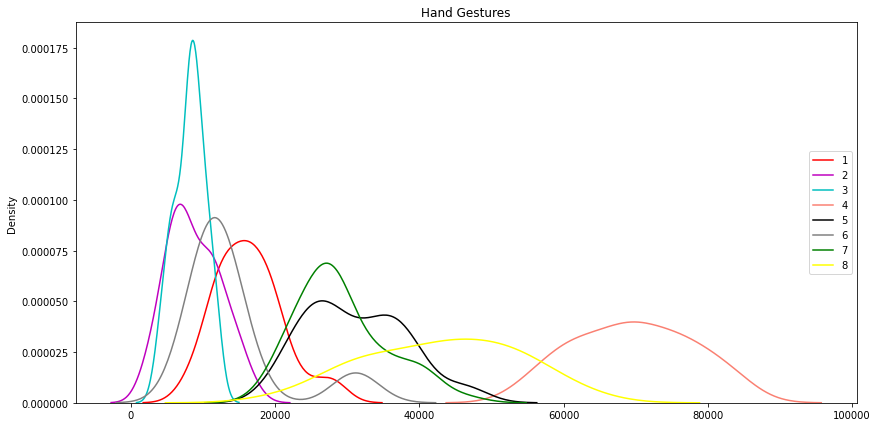

In [18]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,2]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,2]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,2]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,2]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,2]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,2]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,2]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,2]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

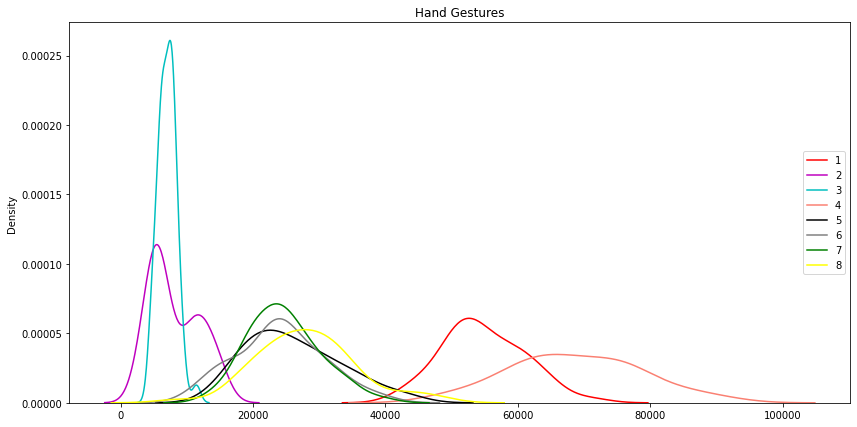

In [19]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,3]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,3]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,3]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,3]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,3]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,3]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,3]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,3]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

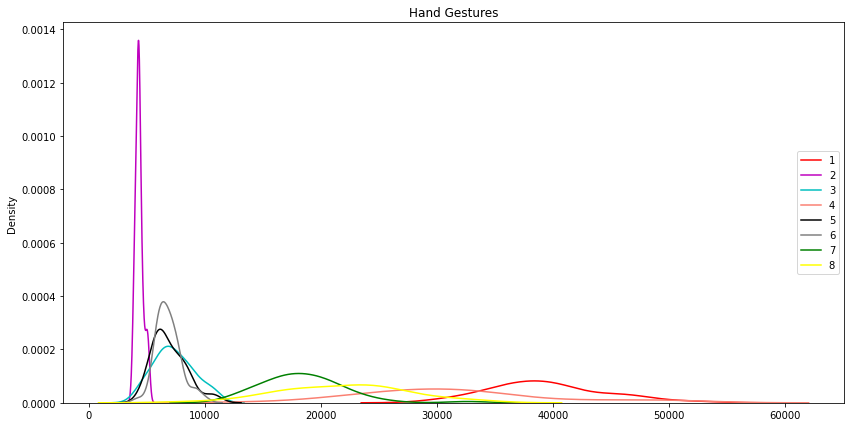

In [20]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,4]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,4]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,4]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,4]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,4]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,4]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,4]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,4]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

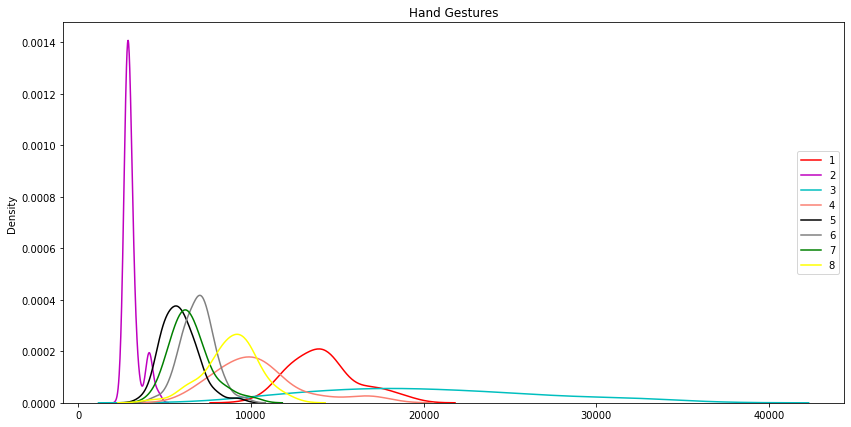

In [21]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,5]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,5]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,5]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,5]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,5]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,5]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,5]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,5]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

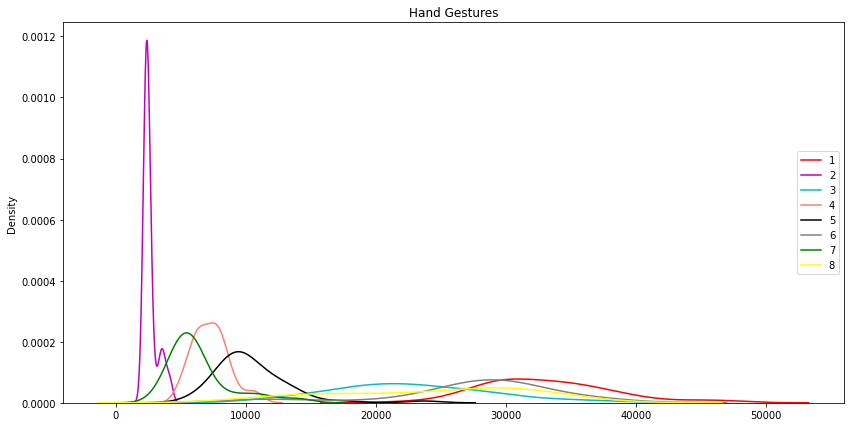

In [22]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,6]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,6]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,6]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,6]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,6]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,6]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,6]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,6]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/hp/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

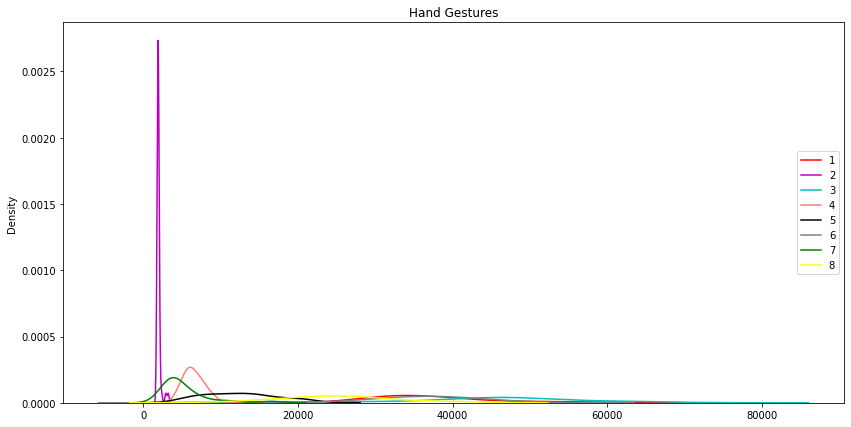

In [23]:
plt.figure(figsize=(14,7))
#plt.subplot(2,2,1)
plt.title('Hand Gestures')
sns.distplot(list(d_1.iloc[:,7]),color = 'r',hist = False, label = '1')
sns.distplot(list(d_2.iloc[:,7]),color = 'm',hist = False, label = '2')
sns.distplot(list(d_3.iloc[:,7]),color = 'c',hist = False, label = '3')
sns.distplot(list(d_4.iloc[:,7]),color = 'salmon',hist = False, label = '4')
sns.distplot(list(d_5.iloc[:,7]),color = 'black',hist = False, label = '5')
sns.distplot(list(d_6.iloc[:,7]),color = 'grey',hist = False, label = '6')
sns.distplot(list(d_7.iloc[:,7]),color = 'green',hist = False, label = '7')
sns.distplot(list(d_8.iloc[:,7]),color = 'yellow',hist = False, label = '8')

plt.legend(loc='center right')
plt.show()

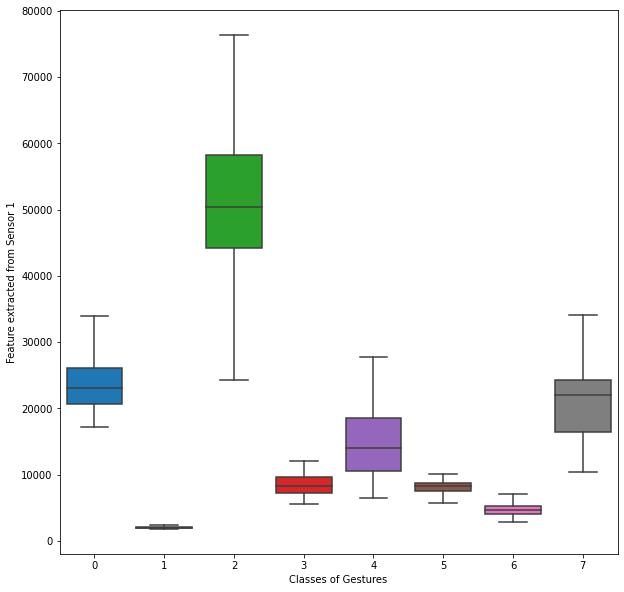

In [16]:

plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

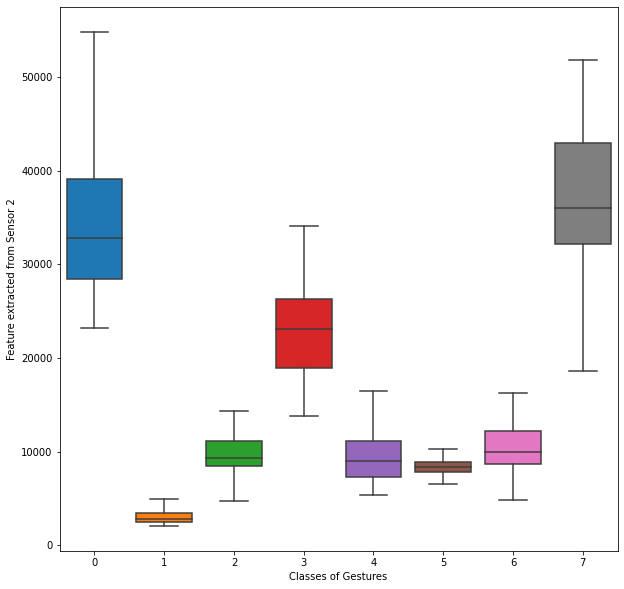

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

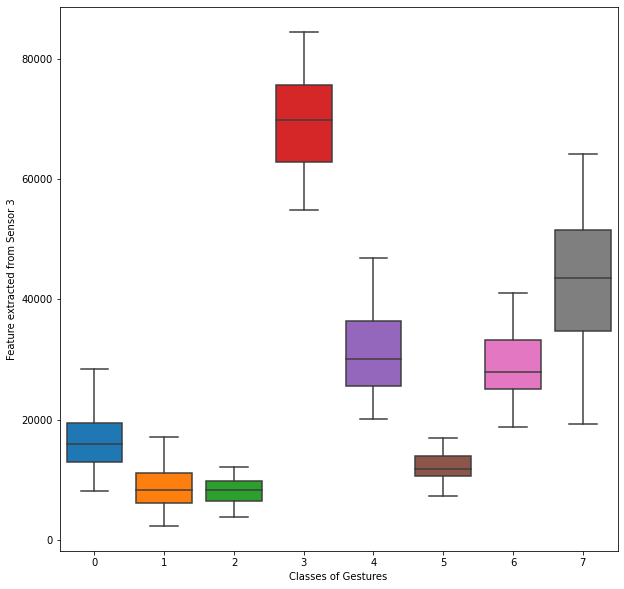

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

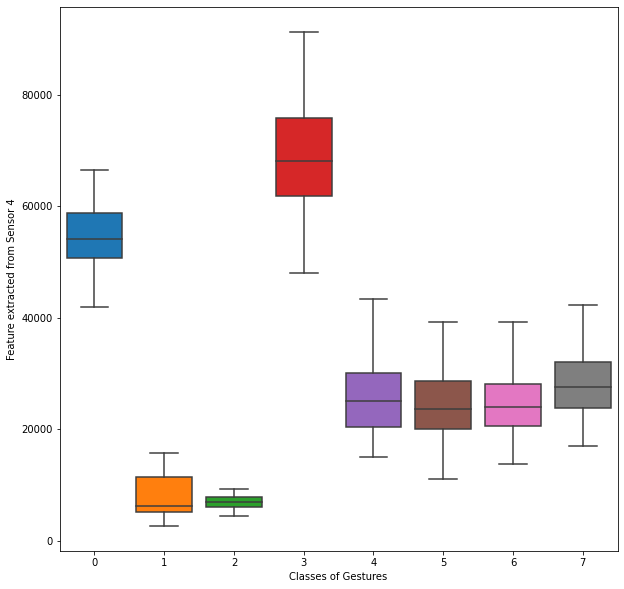

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

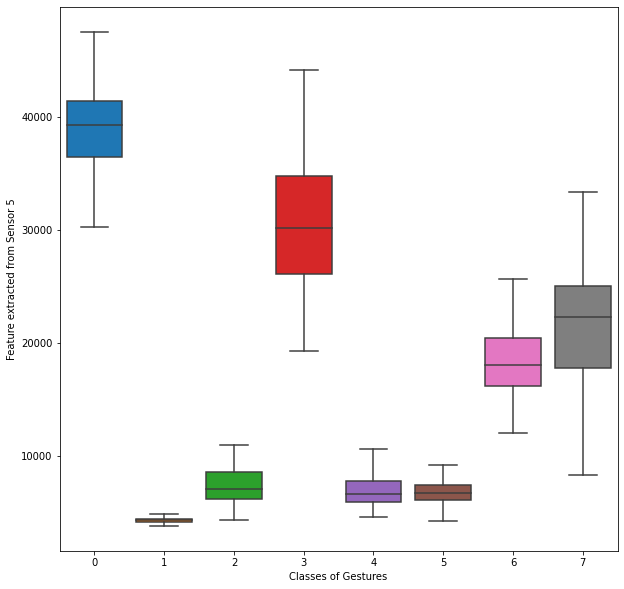

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

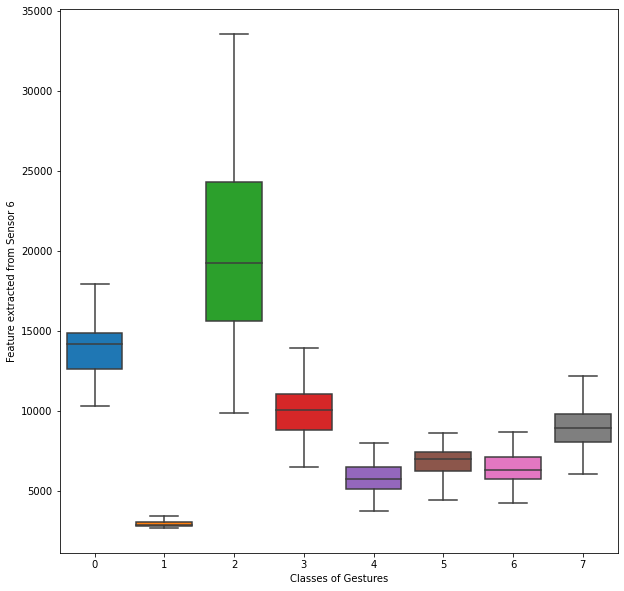

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

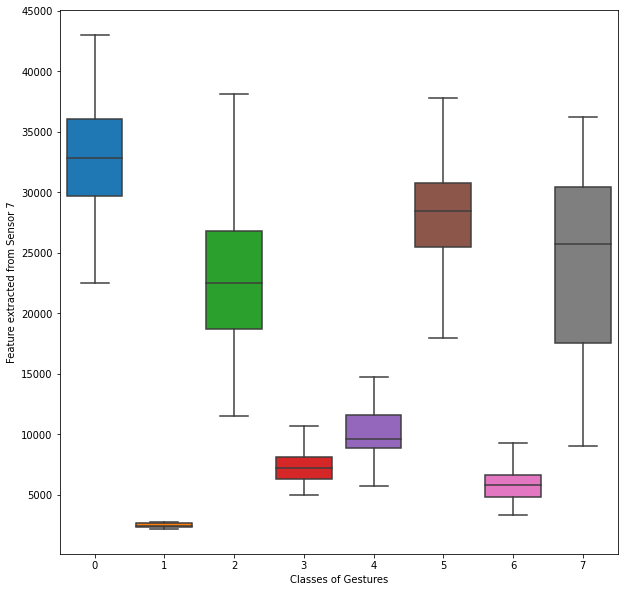

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

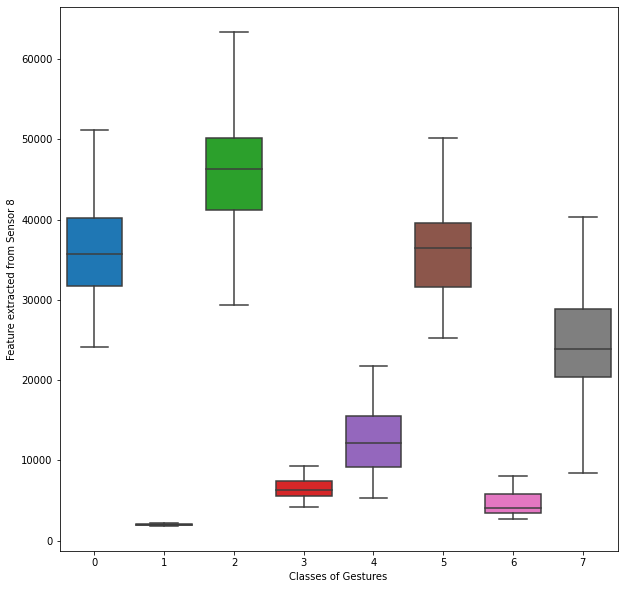

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

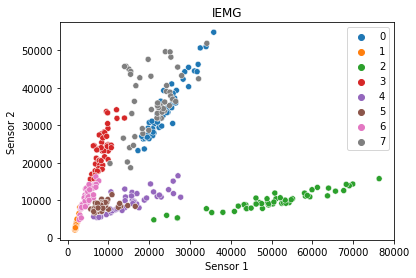

In [48]:
# Scatter plot for data from first two sensors for several categories

scatter_iemg = pd.read_csv('/home/hp/Myo_dataset/final_iemg.csv', header=None )
ax = sns.scatterplot(x = scatter_iemg.iloc[:, 0], y = scatter_iemg.iloc[:, 1], hue = scatter_iemg.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='IEMG')
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ['0', '1', '2', '3', '4', '5', '6', '7'])

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'MAV')]

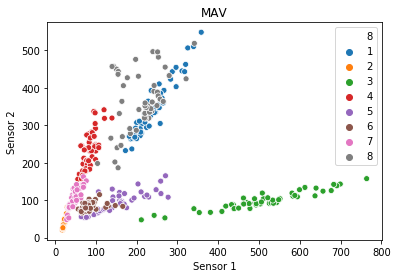

In [27]:
# Scatter plot for data from first two sensors for several categories

scatter_mav = pd.read_csv('/home/hp/Myo_dataset/final_mav.csv', header=None )
ax = sns.scatterplot(x = scatter_mav.iloc[:, 0], y = scatter_mav.iloc[:, 1], hue = scatter_mav.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='MAV')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'MAV1')]

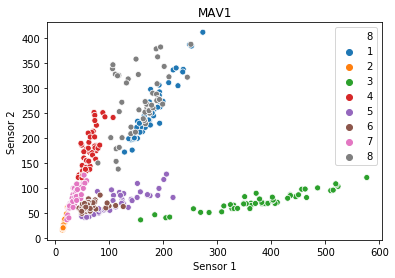

In [28]:
# Scatter plot for data from first two sensors for several categories

scatter_mav1 = pd.read_csv('/home/hp/Myo_dataset/final_mav1.csv', header=None )
ax = sns.scatterplot(x = scatter_mav1.iloc[:, 0], y = scatter_mav1.iloc[:, 1], hue = scatter_mav1.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='MAV1')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'Variance')]

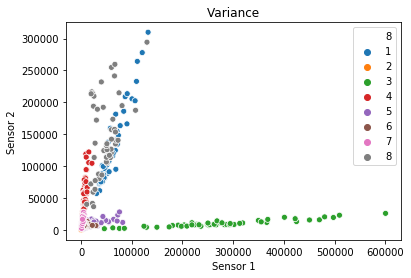

In [29]:
# Scatter plot for data from first two sensors for several categories

scatter_var = pd.read_csv('/home/hp/Myo_dataset/final_variance.csv', header=None )
ax = sns.scatterplot(x = scatter_var.iloc[:, 0], y = scatter_var.iloc[:, 1], hue = scatter_var.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='Variance')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'RMS')]

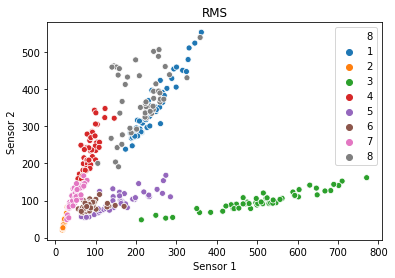

In [30]:
# Scatter plot for data from first two sensors for several categories

scatter_rms = pd.read_csv('/home/hp/Myo_dataset/final_rms.csv', header=None )
ax = sns.scatterplot(x = scatter_rms.iloc[:, 0], y = scatter_rms.iloc[:, 1], hue = scatter_rms.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='RMS')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'WL')]

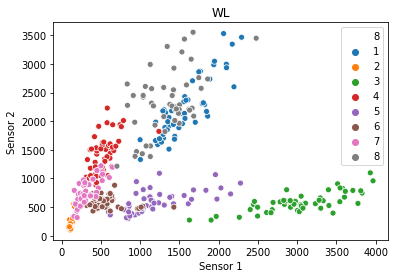

In [31]:
# Scatter plot for data from first two sensors for several categories

scatter_waveform = pd.read_csv('/home/hp/Myo_dataset/final_waveform.csv', header=None )
ax = sns.scatterplot(x = scatter_waveform.iloc[:, 0], y = scatter_waveform.iloc[:, 1], hue = scatter_waveform.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='WL')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'AAC')]

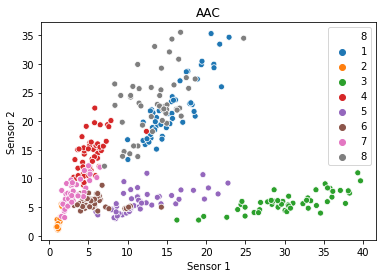

In [32]:
# Scatter plot for data from first two sensors for several categories

scatter_amp = pd.read_csv('/home/hp/Myo_dataset/final_avg_amp_change.csv', header=None )
ax = sns.scatterplot(x = scatter_amp.iloc[:, 0], y = scatter_amp.iloc[:, 1], hue = scatter_amp.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='AAC')

[Text(0,0.5,'Sensor 2'), Text(0.5,0,'Sensor 1'), Text(0.5,1,'DASDV')]

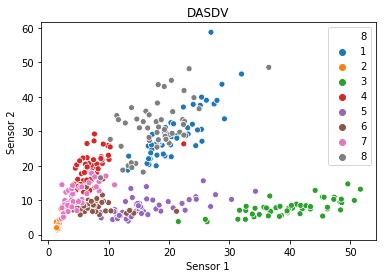

In [33]:
# Scatter plot for data from first two sensors for several categories

scatter_diff = pd.read_csv('/home/hp/Myo_dataset/final_diff_abs_std_dev_val.csv', header=None )
ax = sns.scatterplot(x = scatter_diff.iloc[:, 0], y = scatter_diff.iloc[:, 1], hue = scatter_diff.iloc[:, 8], palette = sns.color_palette(n_colors = 8),legend="full")
ax.set(xlabel='Sensor 1', ylabel='Sensor 2', title='DASDV')

In [16]:
#shuffles the rows of a dataframe

data_final = pd.read_csv('/home/hp/Myo_dataset/final_iemg.csv', header=None )
#data_final = pd.read_csv('final_diff_abs_std_dev_val.csv', header=None ) 
data_final = data_final.sample(frac=1,random_state=30 )
data_final.head()

0        1        2        3        4        5        6        7  8
35   23546.0  39242.0  27823.0  50964.0  36276.0  13268.0  31041.0  32726.0  0
316   4049.0  10625.0  27818.0  22978.0  16898.0   5929.0   5008.0   3645.0  6
281   7239.0   7821.0  11361.0  23505.0   6676.0   6983.0  29333.0  33672.0  5
74    1927.0   2784.0   8098.0   6028.0   4280.0   2871.0   2338.0   1810.0  1
296   6790.0   9328.0   8755.0  14188.0   5404.0   5484.0  24240.0  27950.0  5

In [17]:
#partitions the dataframe into data and labels(ground truths)

data_data = data_final.iloc[:,0:8]
print(data_data.head())
print('--------------------------------------------')
data_label = data_final.iloc[:,8]
print(data_label.head())

           0        1        2        3        4        5        6        7
35   23546.0  39242.0  27823.0  50964.0  36276.0  13268.0  31041.0  32726.0
316   4049.0  10625.0  27818.0  22978.0  16898.0   5929.0   5008.0   3645.0
281   7239.0   7821.0  11361.0  23505.0   6676.0   6983.0  29333.0  33672.0
74    1927.0   2784.0   8098.0   6028.0   4280.0   2871.0   2338.0   1810.0
296   6790.0   9328.0   8755.0  14188.0   5404.0   5484.0  24240.0  27950.0
--------------------------------------------
35     0
316    6
281    5
74     1
296    5
Name: 8, dtype: int64


In [18]:
#partitions the data into train and test

data_train, data_test, label_train, label_test = train_test_split(data_data, data_label, test_size=0.3, stratify=data_label, random_state=30)
print(len(data_train))
print(len(label_test))
print('--------------------------------------------')
print(data_train.head())
print('--------------------------------------------')
print(data_test.head())
print('--------------------------------------------')
print(label_train.head())
print('--------------------------------------------')
print(label_test.head())
print('--------------------------------------------')

280
120
--------------------------------------------
           0        1        2        3        4        5        6        7
323   4237.0   9532.0  25688.0  28746.0  18954.0   6279.0   5919.0   4094.0
158   9896.0  29138.0  71297.0  68035.0  28580.0  10207.0   7958.0   7764.0
11   18573.0  26301.0  12097.0  45278.0  30386.0  11365.0  28384.0  32145.0
5    32515.0  50604.0  28398.0  61755.0  47511.0  18559.0  45930.0  58142.0
216   7125.0   5384.0  20813.0  15951.0   5066.0   5349.0   8885.0   6163.0
--------------------------------------------
           0        1        2        3        4        5        6        7
239  10401.0   7653.0  27948.0  22041.0   6141.0   6711.0  13124.0   7053.0
266  12766.0   9121.0  30913.0  30932.0   7185.0   6744.0  13275.0  12351.0
123  24273.0   5950.0   8318.0   5053.0   5690.0  16956.0  19702.0  22810.0
282   6689.0   7574.0   8670.0  17645.0   5527.0   7058.0  26123.0  32167.0
392  22032.0  35161.0  46017.0  29314.0  25084.0   9854.0  27057.0

In [19]:
#computes number of samples in each class of the test set

print(label_test.value_counts())

0    15
1    15
2    15
3    15
4    15
5    15
6    15
7    15
Name: 8, dtype: int64


In [20]:
def calculate_metrics(X, Y):

    cm = confusion_matrix(X, Y, binary=False)
    #print("Confusion Matrix")
    #print(cm)
    
    #labels = list(string.ascii_lowercase)
    #labels = label_test
    labels = [1, 2, 3, 4, 5, 6, 7, 8]
    #print(labels)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 7))
        ax = sns.heatmap(cm, annot=True)
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    print('---------------------------------------------------------------')
    
    mcm = multilabel_confusion_matrix(X, Y)
    #print(mcm)

    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]

    # calculates recall/true positive rate/sensitivity for each class
    print("TPR")
    TPR = tp / (tp + fn)
    print(TPR)
    print('---------------------------------------------------------------')

    # calculates specificity/true negative rate for each class
    print("TNR")
    TNR = tn / (tn + fp)
    print(TNR)
    print('---------------------------------------------------------------')
    
    # calculates fall out/false positive rate for each class
    print("FPR")
    FPR = fp / (fp + tn)
    print(FPR)
    print('---------------------------------------------------------------')
    
    # calculates miss rate/false negative rate for each class
    print("FNR")
    FNR = fn / (fn + tp)
    print(FNR)
    print('---------------------------------------------------------------')
    
    print("Confusion Matrix")

In [30]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
#micro_totalTime = totalTime * 1000000
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(max_depth=40, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=20, random_state=30)
--------------------------------------------------------------------------
Best estimator score: 0.9678571428571429
--------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 20, 'random_state': 30}
Best estimator: KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=7)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 7}
Best estimator: SVC(C=1.2400000000000002, decision_function_shape='ovo', random_state=30)
---------------------------------------------

--------------------------------------------------
99.16666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.93333333
 1.         1.        ]
---------------------------------------------------------------
TNR
[1.         1.         1.         1.         0.99047619 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.         0.         0.         0.00952381 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.06666667
 0.         0.        ]
---------------------------------------------------------------
Confusion Matrix


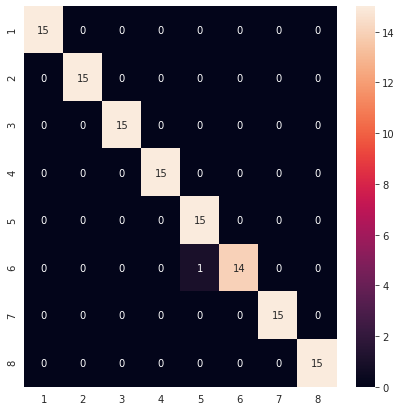

In [31]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [40]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
#micro_totalTime = totalTime * 1000000
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(decision_function_shape='ovo', random_state=30)
--------------------------------------------------------------------------
Best estimator score: 0.978125
--------------------------------------------------------------------------
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, decision_function_shape='ovo', random_state=30)
--------------------------------------------------------------------------
Best estimator score: 0.978125
--------------------------------------------------------------------------
Best parameters: {'C': 5.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=0.01, decision_function_shape='ovo', kernel='linear', random_state=30)
--------------------------------------------------------------------------
Best estimator score: 0.978125
--------------------------------------------------------------

--------------------------------------------------
100.0
--------------------------------------------------
---------------------------------------------------------------
TPR
[1. 1. 1. 1. 1. 1. 1. 1.]
---------------------------------------------------------------
TNR
[1. 1. 1. 1. 1. 1. 1. 1.]
---------------------------------------------------------------
FPR
[0. 0. 0. 0. 0. 0. 0. 0.]
---------------------------------------------------------------
FNR
[0. 0. 0. 0. 0. 0. 0. 0.]
---------------------------------------------------------------
Confusion Matrix


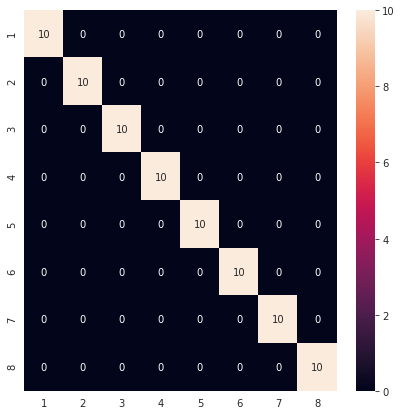

In [41]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in minutes to train the model :  102.355178018411
Best estimator: BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=40,
                                                        min_samples_leaf=3,
                                                        min_samples_split=8,
                                                        random_state=30),
                  bootstrap=False, bootstrap_features=True, max_features=0.5,
                  n_estimators=17, random_state=30)
--------------------------------------------------------------------------
Best estimator score: 0.978125
--------------------------------------------------------------------------
Best parameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 40, 'base_estimator__min_samples_leaf': 3, 'base_estimator__min_samples_split': 8, 'base_estimator__random_state': 30, 'bootstrap': False, 'bootstrap_f

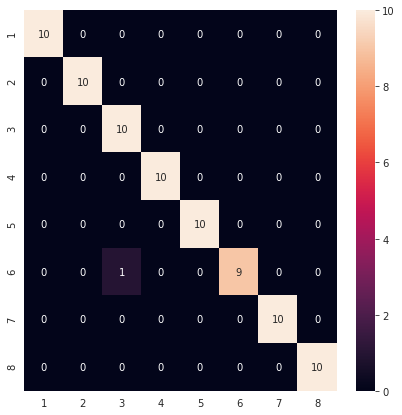

In [42]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
#micro_totalTime = totalTime * 1000000
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')

category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)



Time taken in seconds to train the model :  166.86192536354065
--------------------------------------------------
97.91666666666666
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.9
 0.96666667 0.96666667]
---------------------------------------------------------------
TNR
[1.         0.9952381  1.         1.         0.98095238 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.0047619  0.         0.         0.01904762 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.1
 0.03333333 0.03333333]
---------------------------------------------------------------
Confusion Matrix


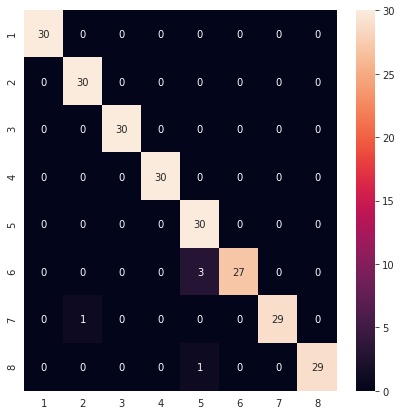

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
#micro_totalTime = totalTime * 1000000
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')

category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [87]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 

              

In [97]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder =False), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    print('--------------------------------------------------') 
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    #micro_totalTime = totalTime * 1000000
    print("Time taken in minutes to train the model : ", totalTime) 
    
    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hp/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 903, in fit
    train_dmatrix, evals = self._wrap_evaluation_matrices(
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 265, in _wrap_evaluation_matrices
    train_dmatrix = DMatrix(data=X, label=y, weight=sample_weight,
  File "/home/hp/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 509, in __init__
    self.set_info(label=

AttributeError: /home/hp/anaconda3/lib/libxgboost.so: undefined symbol: XGDMatrixSetDenseInfo

In [ ]:
print(xgb.XGBClassifier(booster='gblinear').get_params())

{'base_score': 0.5, 'booster': 'gblinear', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
## MAV feature extraction technique ##

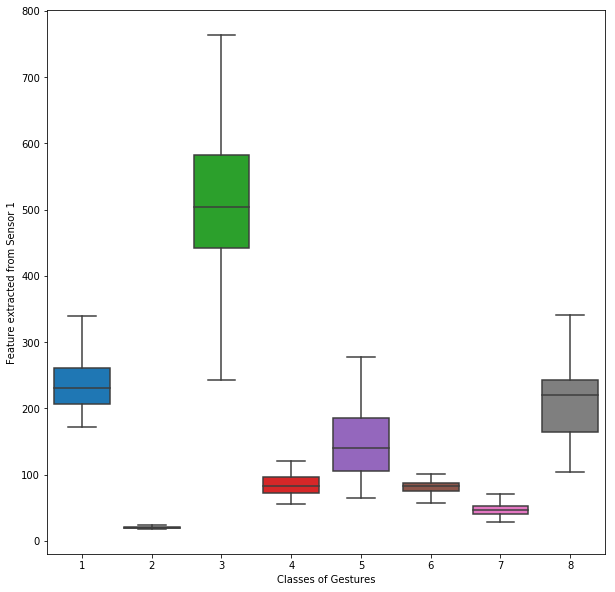

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

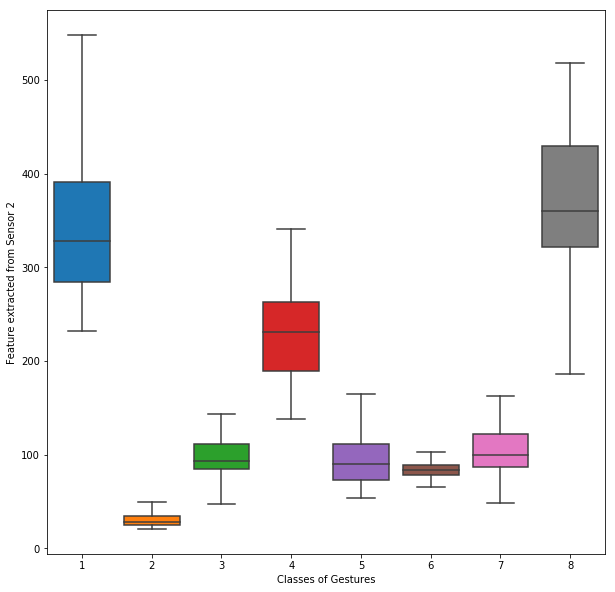

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

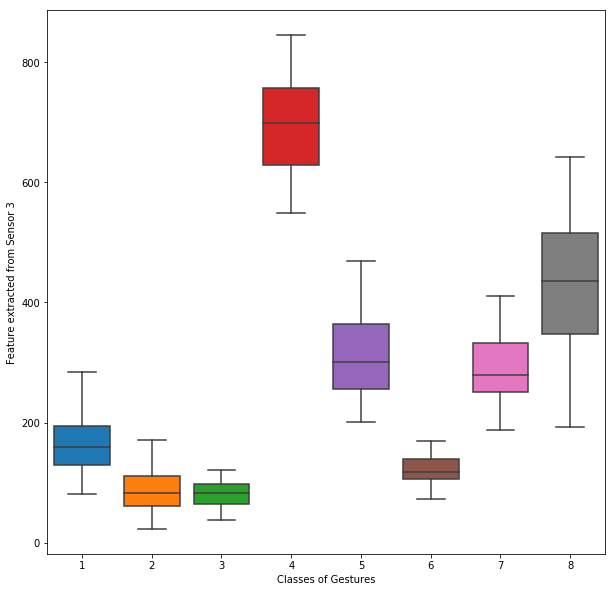

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

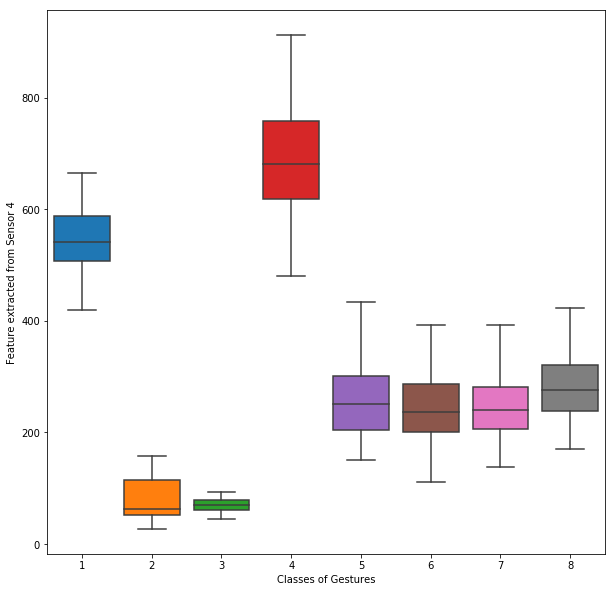

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

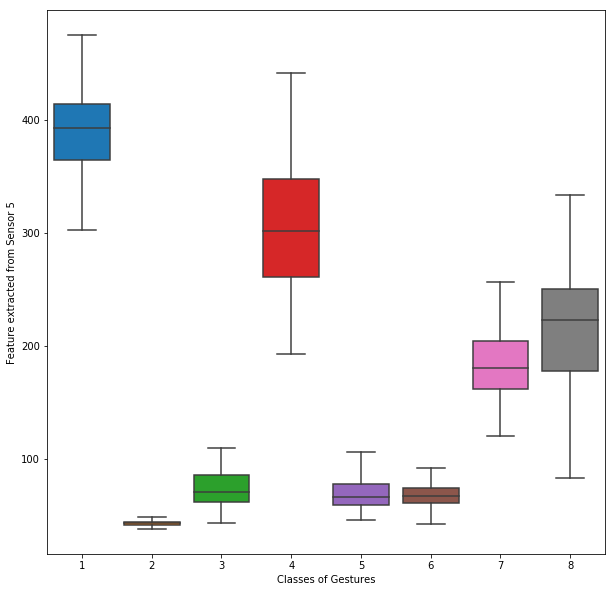

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

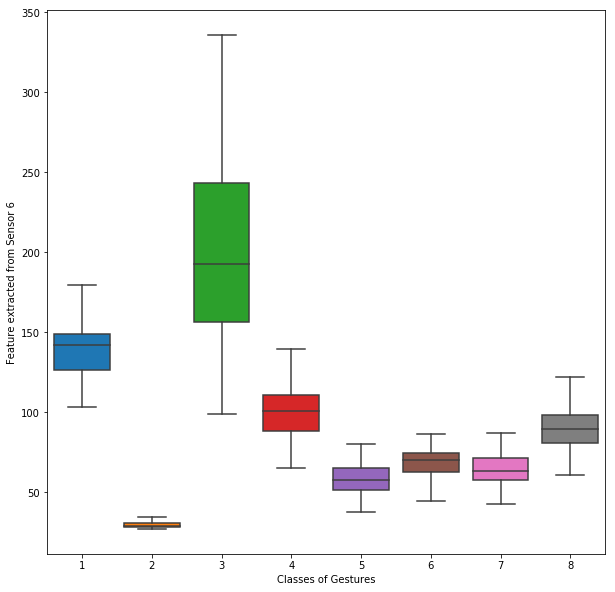

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

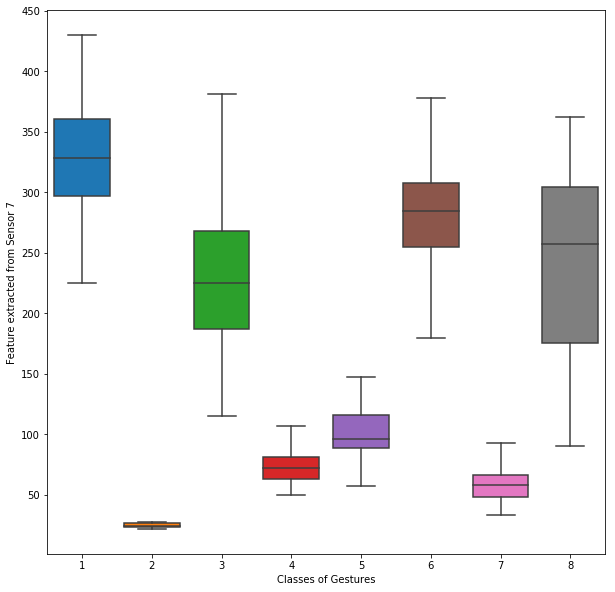

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

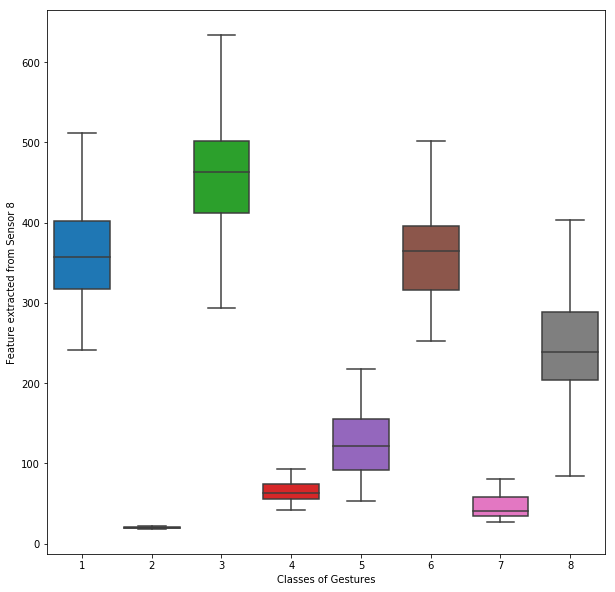

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.96875
--------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 25, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
    

--------------------------------------------------
97.91666666666666
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.96666667]
---------------------------------------------------------------
TNR
[1.         1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.03333333]
---------------------------------------------------------------
Confusion Matrix


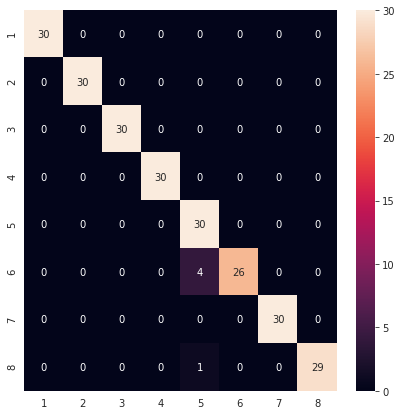

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],  
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
--------------------------------------------------------------------------
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
------------------------------------------------------------------------

--------------------------------------------------
97.5
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.0047619  0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.06666667]
---------------------------------------------------------------
Confusion Matrix


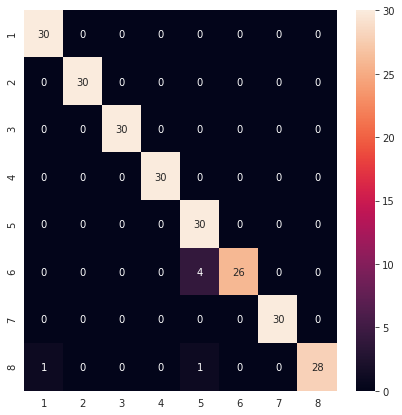

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2456.3691523075104
--------------------------------------------------
97.08333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


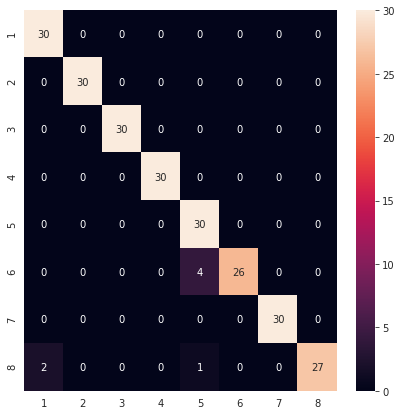

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  59.264424324035645
--------------------------------------------------
97.91666666666666
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.9
 0.96666667 0.96666667]
---------------------------------------------------------------
TNR
[1.         0.9952381  1.         1.         0.98095238 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.0047619  0.         0.         0.01904762 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.1
 0.03333333 0.03333333]
---------------------------------------------------------------
Confusion Matrix


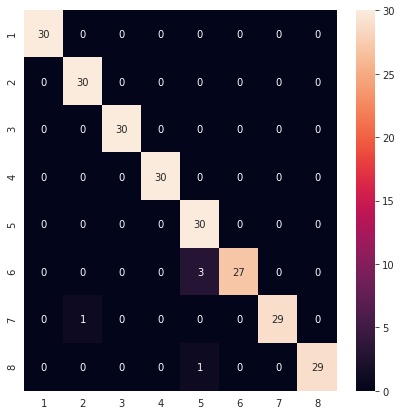

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear', 'rbf'],
        #'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__decision_function_shape': ['ovo'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Parameter grid for XGBoost

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10],
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees
                      #'missing':[-999],
                      'seed': [46]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=501, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=46,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  102.32088088989258
--------------------------------------------------
94.58333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         0.96666667 0.86666667 1.         0.96666667 0.93333333
 0.96666667 0.86666667]
---------------------------------------------------------------
TNR
[0.99047619 0.99047619 1.         1.         0.98571429 0.97619048
 0.9

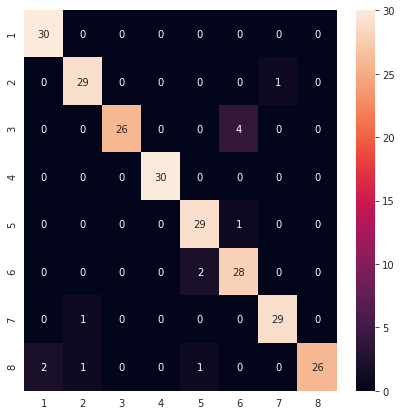

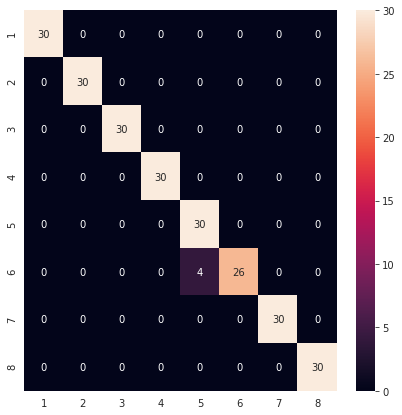

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
    
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## MAV1 feature extraction technique ##

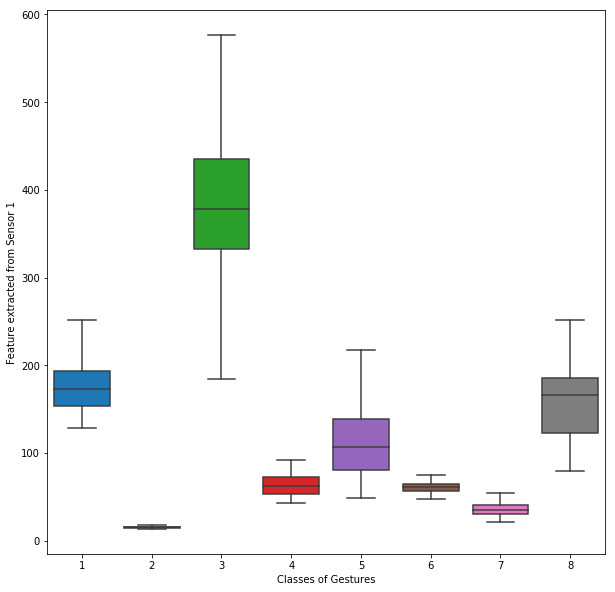

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

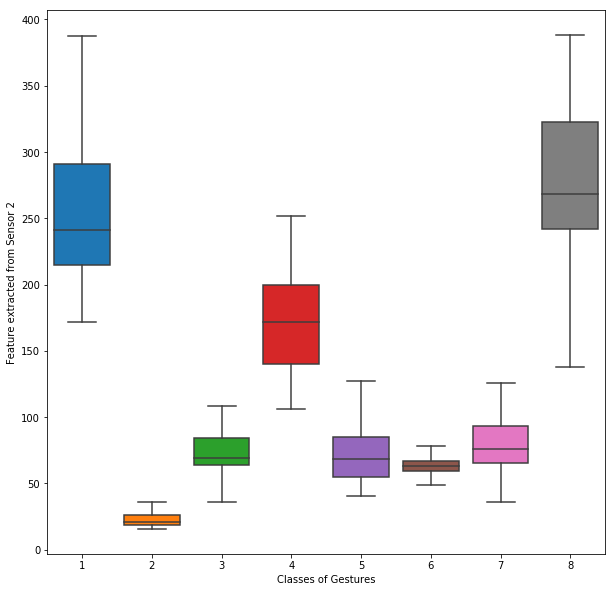

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

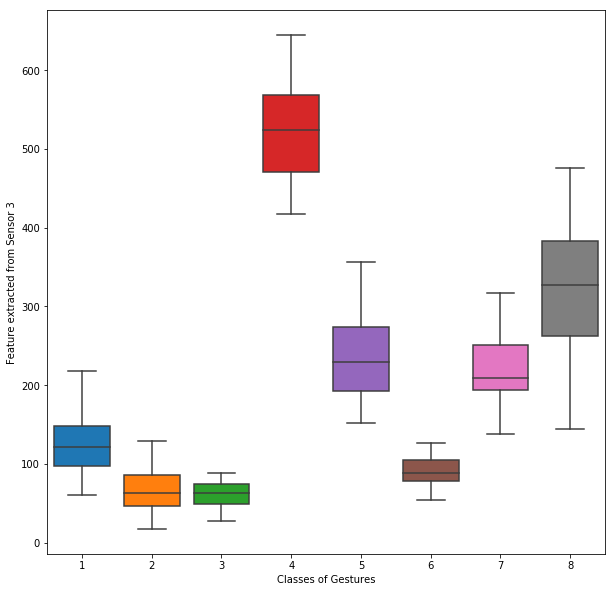

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

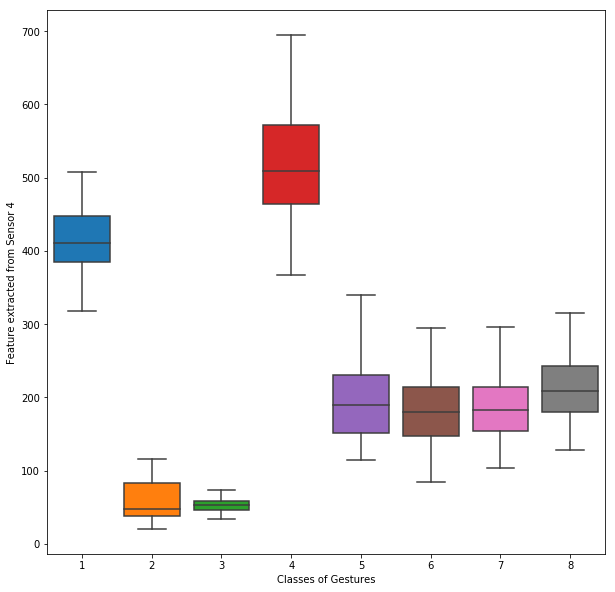

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

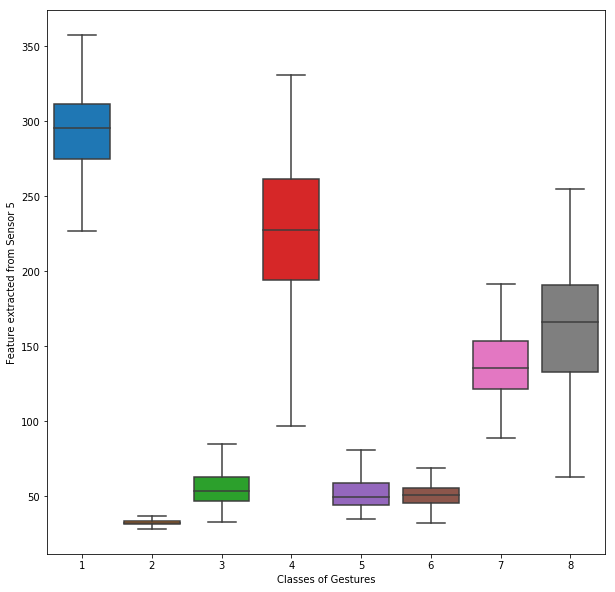

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

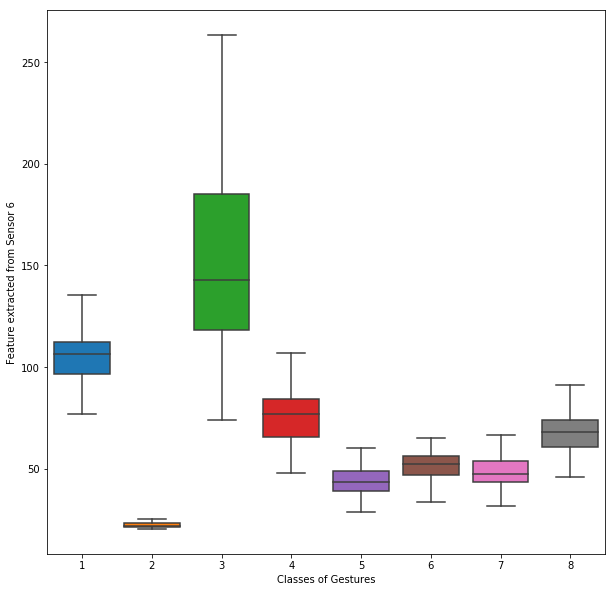

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

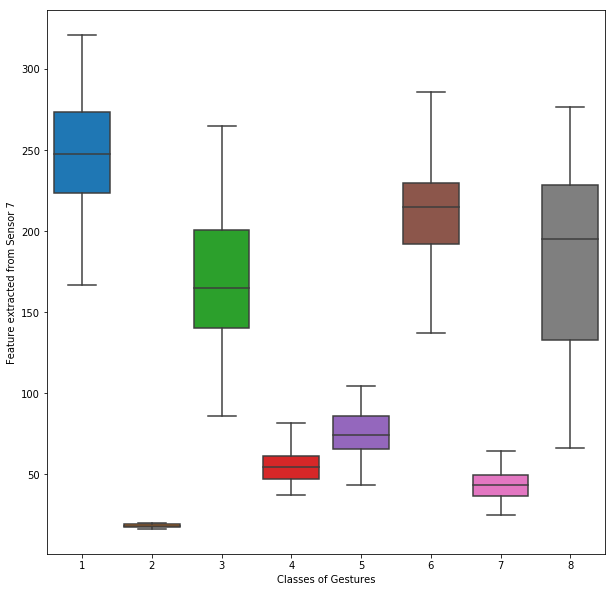

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

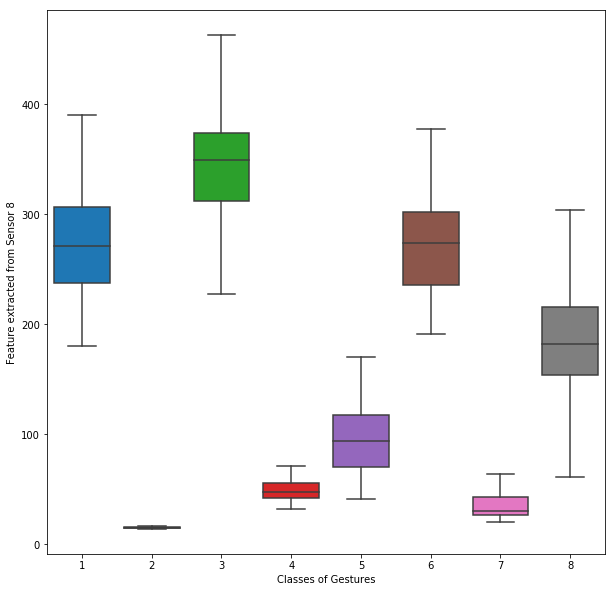

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
    

--------------------------------------------------
97.91666666666666
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.96666667]
---------------------------------------------------------------
TNR
[1.         1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.03333333]
---------------------------------------------------------------
Confusion Matrix


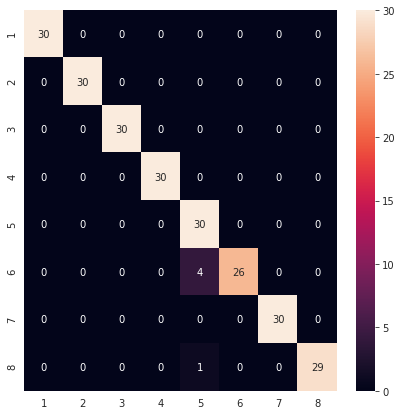

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],  
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'decision_function_shape': ['ovo', 'ovr'],
        'decision_function_shape': ['ovo'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=2.8000000000000016, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=30,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
--------------------------------------------------------------------------
Best parameters: {'C': 2.8000000000000016, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
------------------------------------------

--------------------------------------------------
97.08333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.96666667 0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  0.9952381  1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.0047619  0.0047619  0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.03333333 0.06666667]
---------------------------------------------------------------
Confusion Matrix


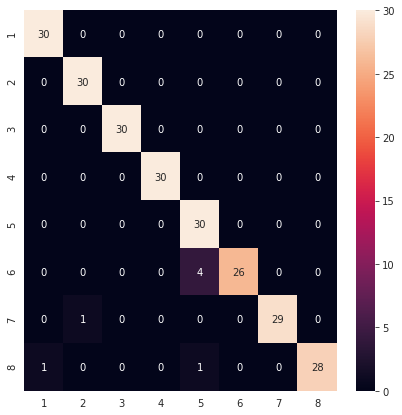

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2671.877898454666
--------------------------------------------------
94.58333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.83333333
 0.9        0.86666667]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         0.9952381  0.96190476 1.
 1.         0.9952381 ]
---------------------------------------------------------------
FPR
[0.00952381 0.0047619  0.         0.0047619  0.03809524 0.
 0.         0.0047619 ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.16666667
 0.1        0.13333333]
---------------------------------------------------------------
Confusion Matrix


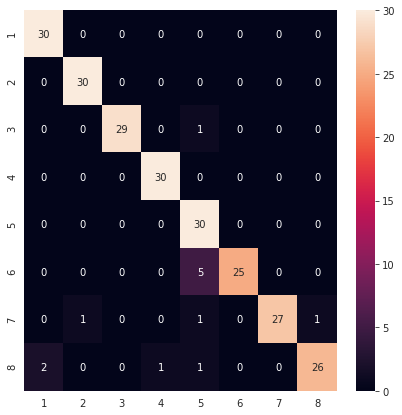

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


Time taken in seconds to train the model :  80.42832374572754
--------------------------------------------------
97.5
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.96666667 0.96666667]
---------------------------------------------------------------
TNR
[1.         0.9952381  1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.0047619  0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.03333333 0.03333333]
---------------------------------------------------------------
Confusion Matrix


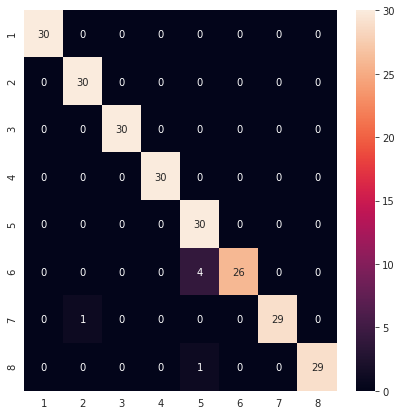

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        #'base_estimator__kernel': ['sigmoid', 'linear', 'rbf'],
        #'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__decision_function_shape': ['ovo'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Parameter grid for XGBoost

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10],
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees
                      #'missing':[-999],
                      'seed': [46]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=46,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  100.9824059009552
--------------------------------------------------
92.91666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         0.96666667 0.86666667 1.         0.9        0.86666667
 0.96666667 0.86666667]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         1.         0.98095238 0.96190476
 0.99

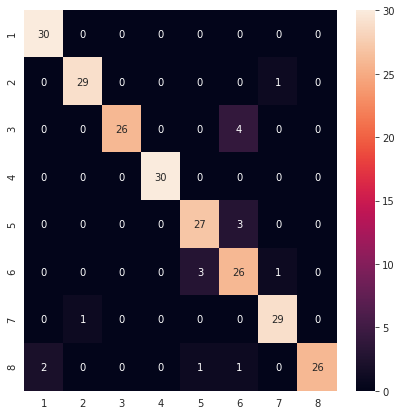

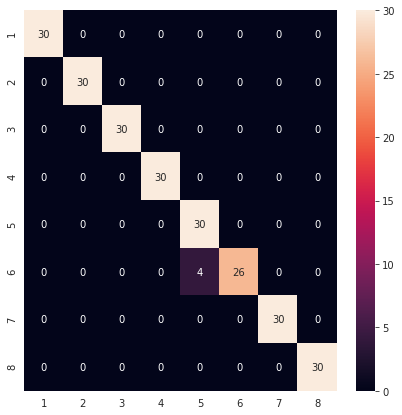

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
    
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## Variance feature extraction technique ##

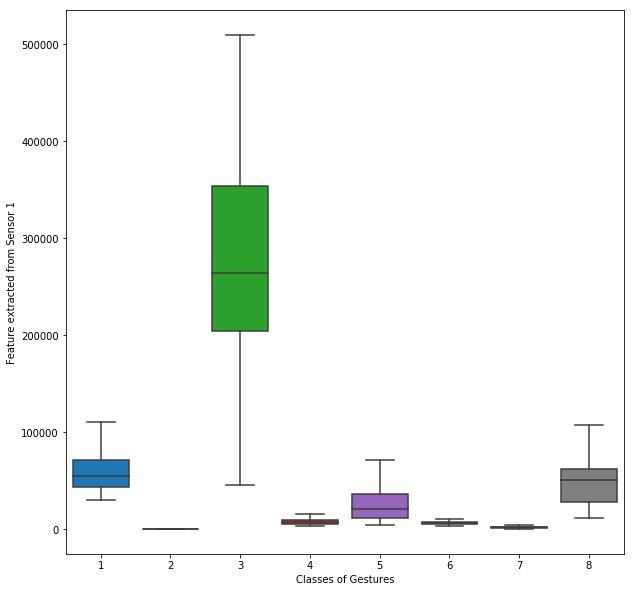

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

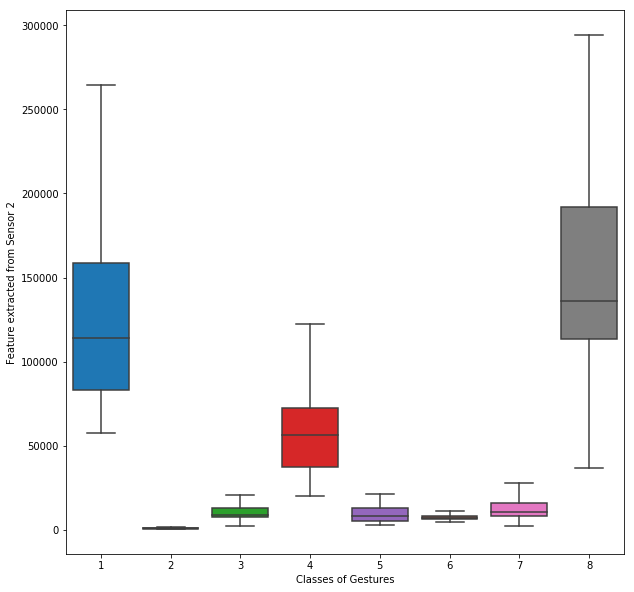

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

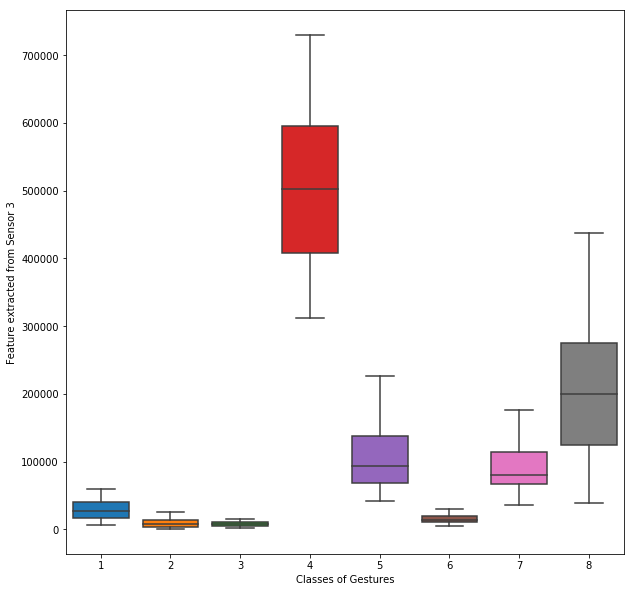

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

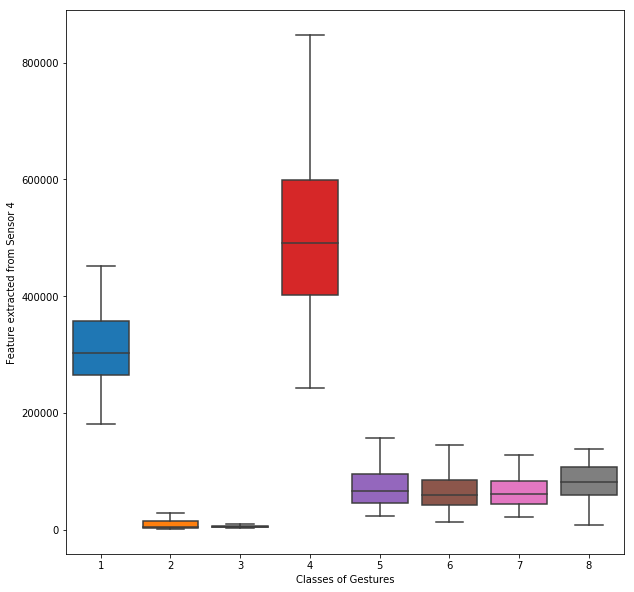

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

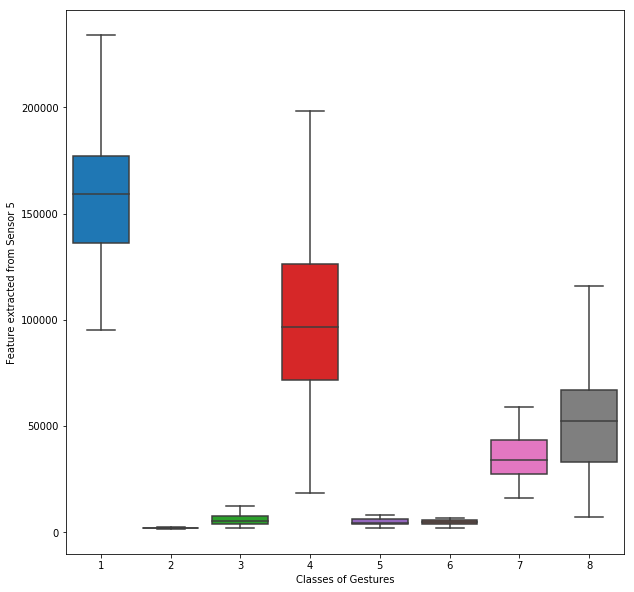

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

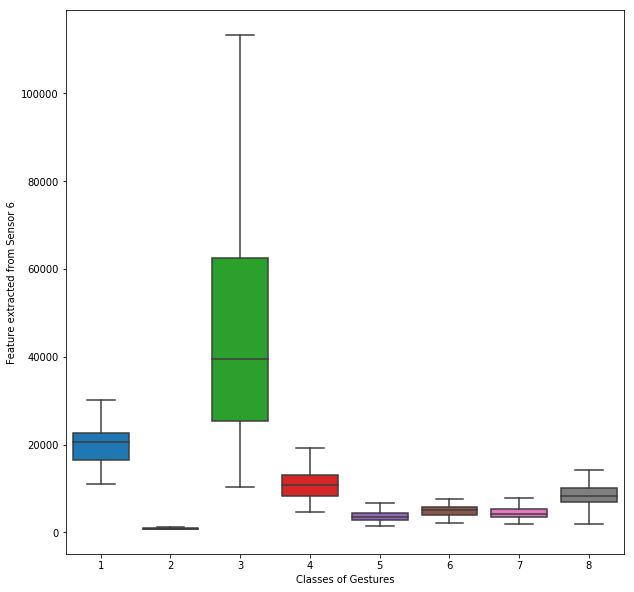

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

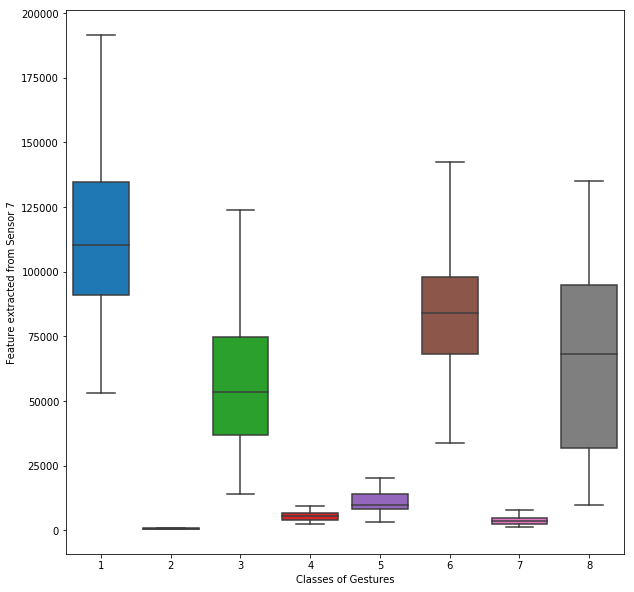

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

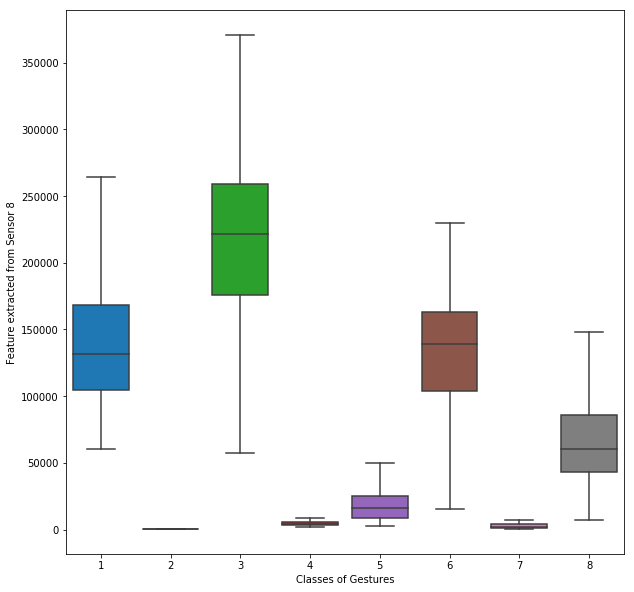

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 10, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
    

--------------------------------------------------
97.08333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  0.9952381  1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.0047619  0.0047619  0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.06666667]
---------------------------------------------------------------
Confusion Matrix


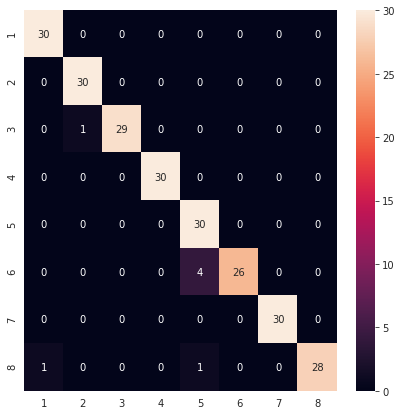

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
--------------------------------------------------------------------------
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
---------------------------------------------------------------

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 0.9        1.        ]
---------------------------------------------------------------
TNR
[1.         0.9952381  1.         1.         0.97142857 1.
 1.         0.9952381 ]
---------------------------------------------------------------
FPR
[0.         0.0047619  0.         0.         0.02857143 0.
 0.         0.0047619 ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.1        0.        ]
---------------------------------------------------------------
Confusion Matrix


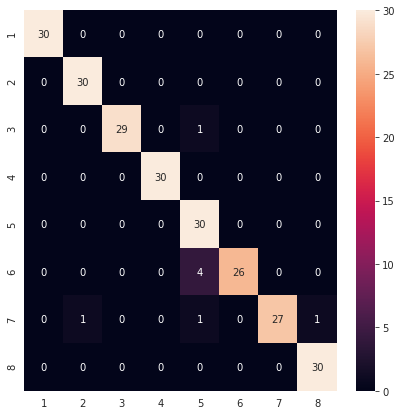

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2378.6763553619385
--------------------------------------------------
96.25
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.93333333 0.9       ]
---------------------------------------------------------------
TNR
[0.9952381  1.         1.         0.9952381  0.97619048 1.
 1.         0.99047619]
---------------------------------------------------------------
FPR
[0.0047619  0.         0.         0.0047619  0.02380952 0.
 0.         0.00952381]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.06666667 0.1       ]
---------------------------------------------------------------
Confusion Matrix


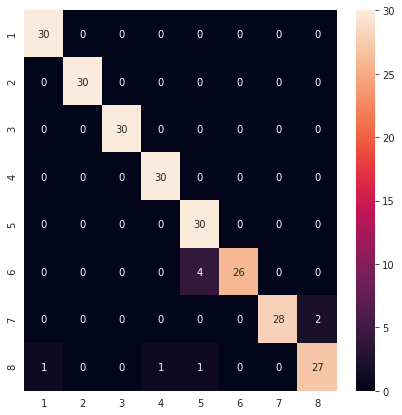

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  129.45787620544434
--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.93333333 1.         1.         0.86666667
 1.         0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  0.98571429 1.         1.         0.98571429 1.
 0.9952381  1.        ]
---------------------------------------------------------------
FPR
[0.0047619  0.01428571 0.         0.         0.01428571 0.
 0.0047619  0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.06666667 0.         0.         0.13333333
 0.         0.06666667]
---------------------------------------------------------------
Confusion Matrix


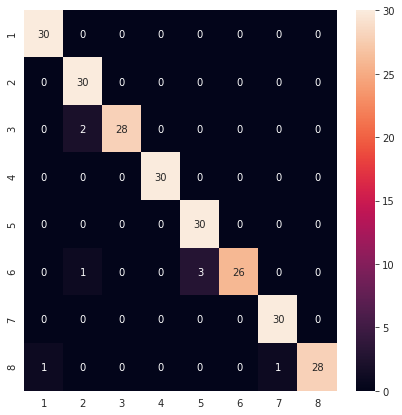

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [ ]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 

              

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  100.5760350227356
--------------------------------------------------
93.75
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         0.96666667 0.86666667 0.96666667 0.96666667 0.9
 0.96666667 0.86666667]
---------------------------------------------------------------
TNR
[0.98571429 0.99047619 1.         1.         0.98571429 0.97619048
 0.99047619 1.        ]
-

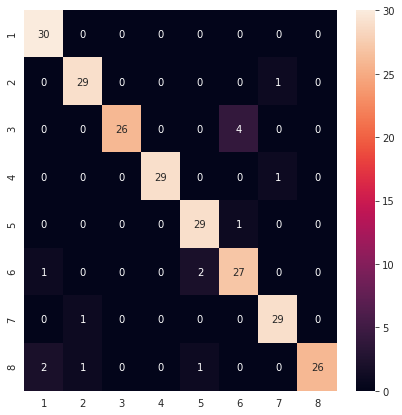

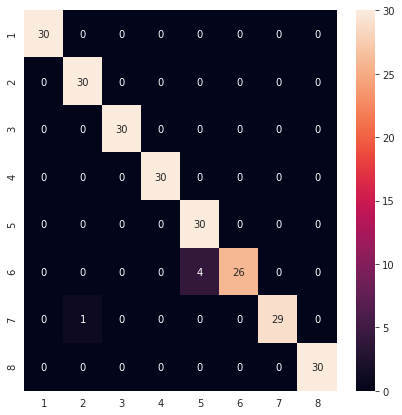

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60

    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## RMS feature extraction technique ##

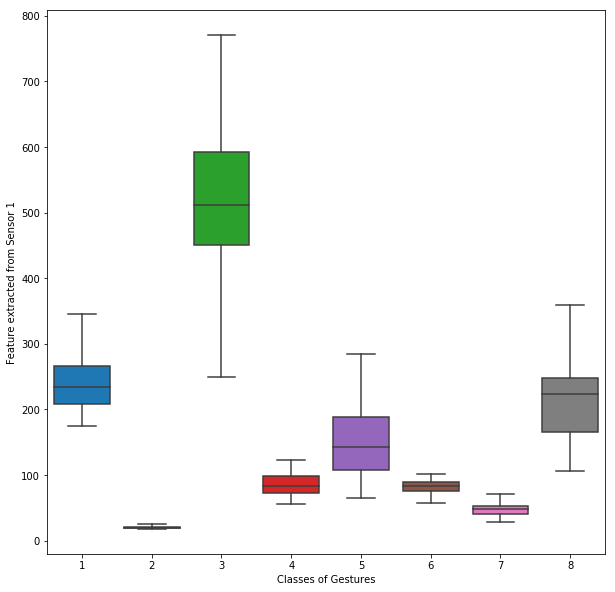

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

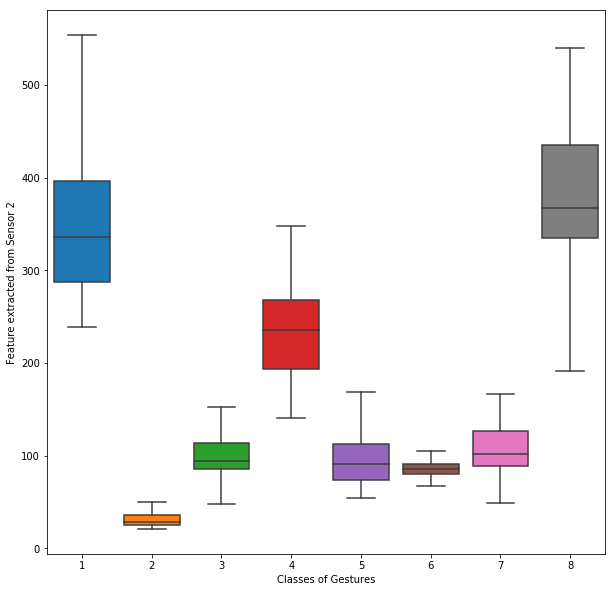

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

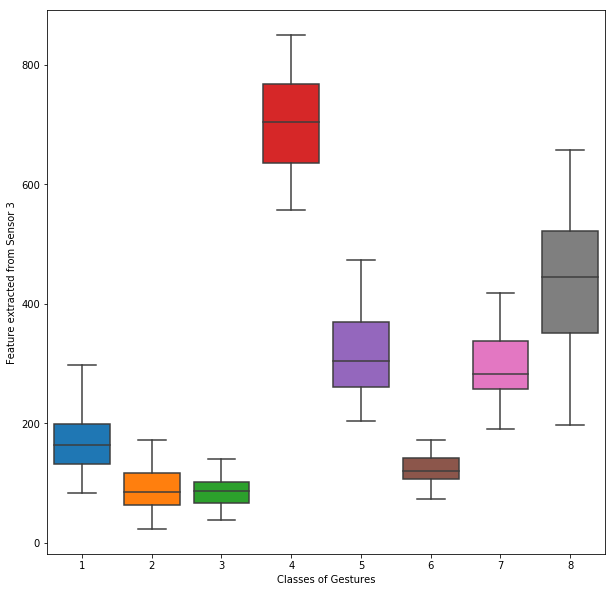

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

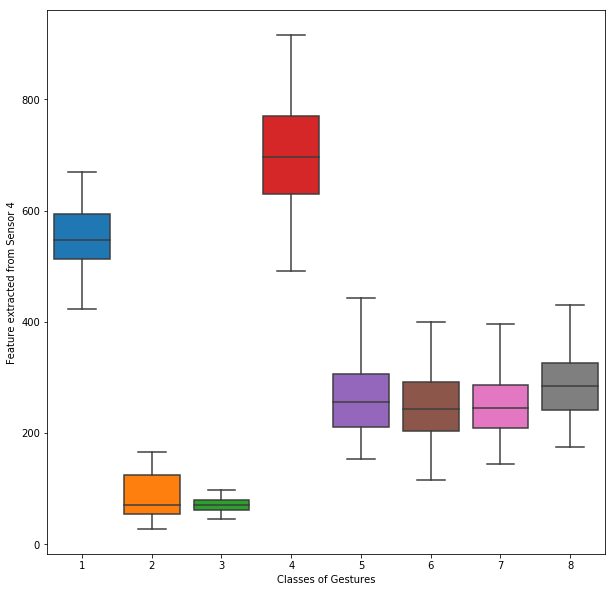

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

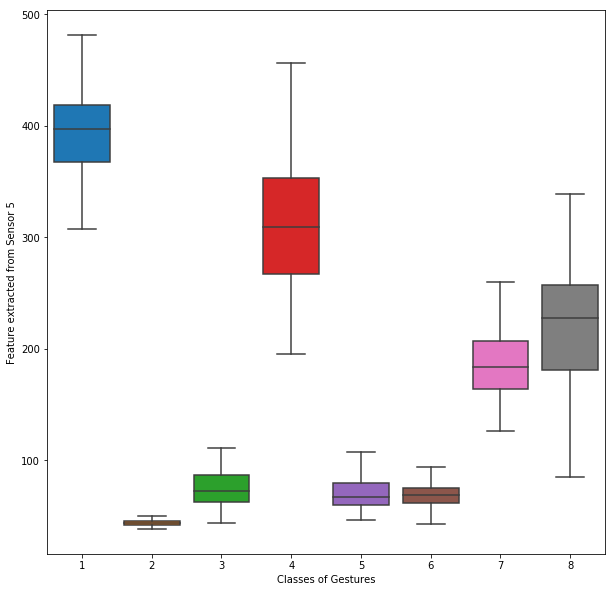

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

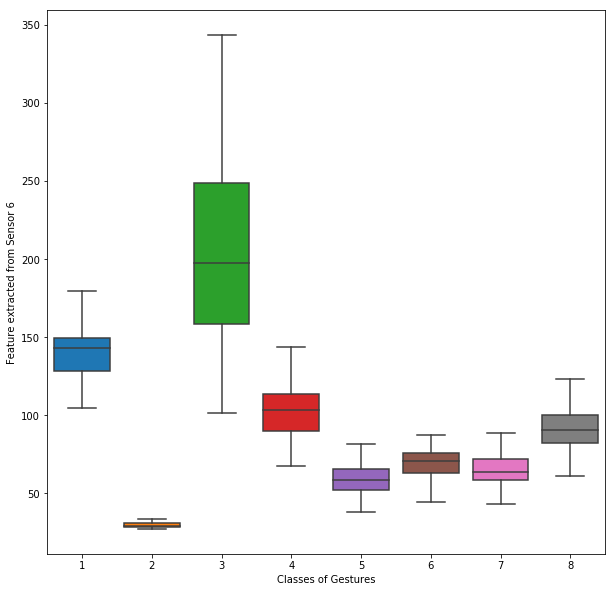

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

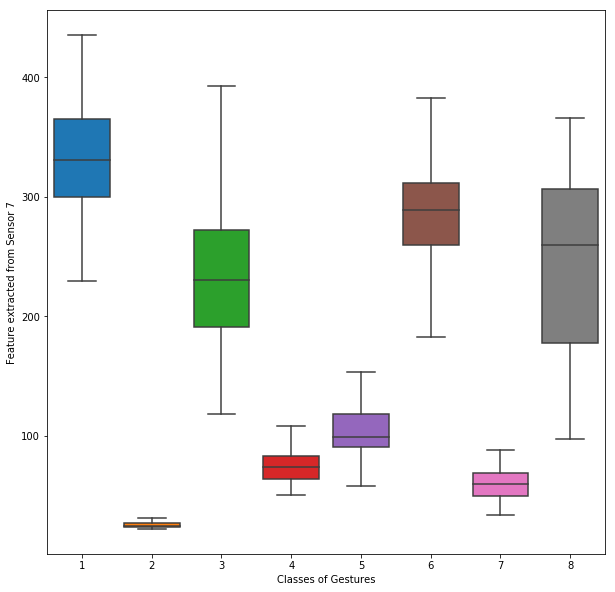

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

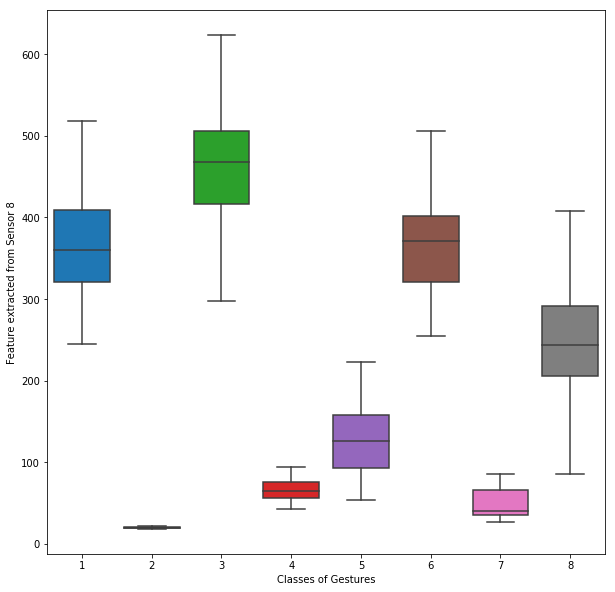

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 10, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
    

--------------------------------------------------
97.91666666666666
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.96666667]
---------------------------------------------------------------
TNR
[1.         1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.03333333]
---------------------------------------------------------------
Confusion Matrix


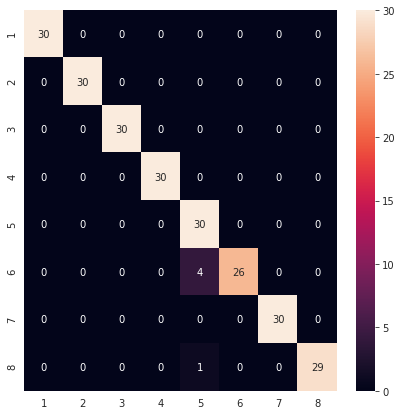

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
--------------------------------------------------------------------------
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.9875
------------------------------------------------------------------------

--------------------------------------------------
97.5
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.0047619  0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.06666667]
---------------------------------------------------------------
Confusion Matrix


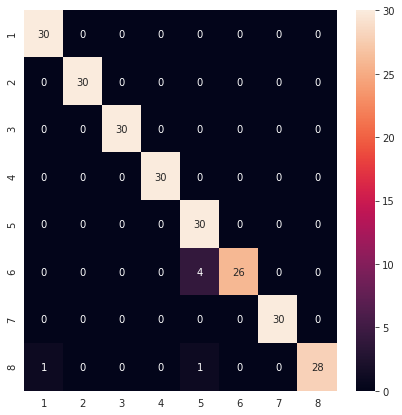

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2402.678019285202
--------------------------------------------------
96.25
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.93333333 0.9       ]
---------------------------------------------------------------
TNR
[0.9952381  1.         1.         0.9952381  0.97619048 1.
 1.         0.99047619]
---------------------------------------------------------------
FPR
[0.0047619  0.         0.         0.0047619  0.02380952 0.
 0.         0.00952381]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.06666667 0.1       ]
---------------------------------------------------------------
Confusion Matrix


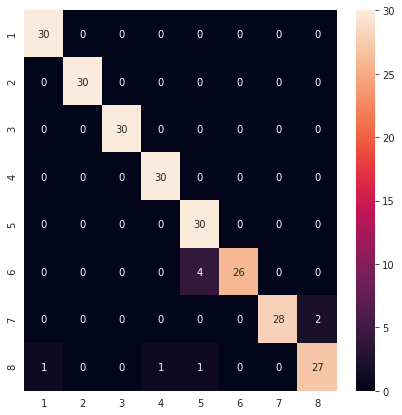

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


Time taken in seconds to train the model :  77.45716857910156
--------------------------------------------------
98.33333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.9
 1.         0.96666667]
---------------------------------------------------------------
TNR
[1.         1.         1.         1.         0.98095238 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.         0.         0.         0.         0.01904762 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.1
 0.         0.03333333]
---------------------------------------------------------------
Confusion Matrix


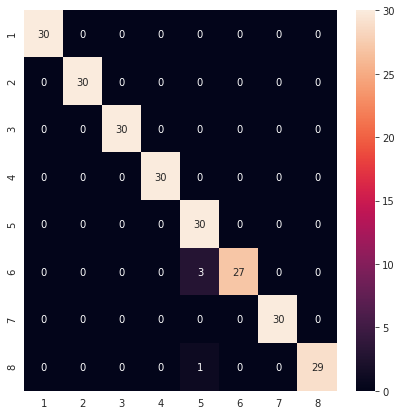

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [ ]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 

              

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  101.28040170669556
--------------------------------------------------
93.75
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         0.96666667 0.86666667 0.96666667 0.96666667 0.9
 0.96666667 0.86666667]
---------------------------------------------------------------
TNR
[0.98571429 0.99047619 1.         1.         0.98571429 0.97619048
 0.99047619 1.        ]


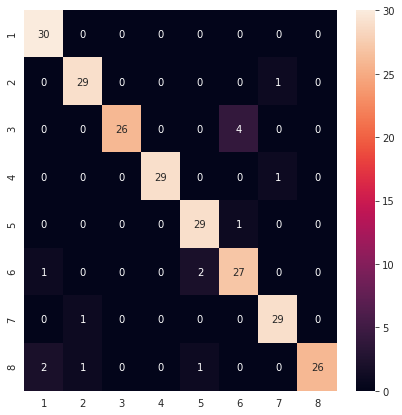

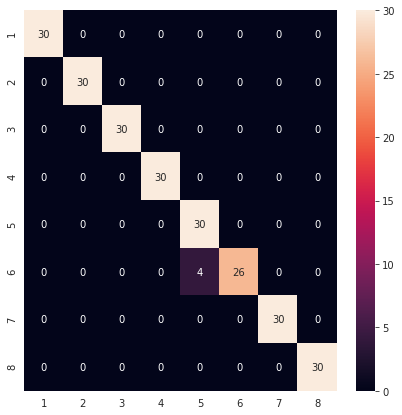

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## Waveform length feature extraction technique ##

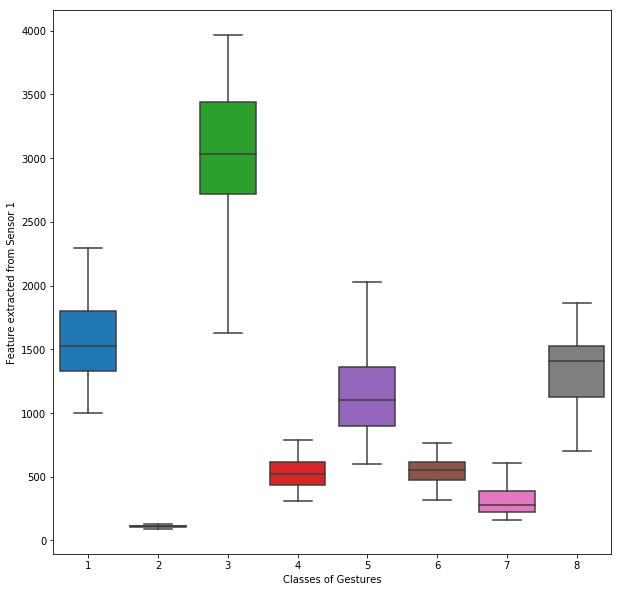

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

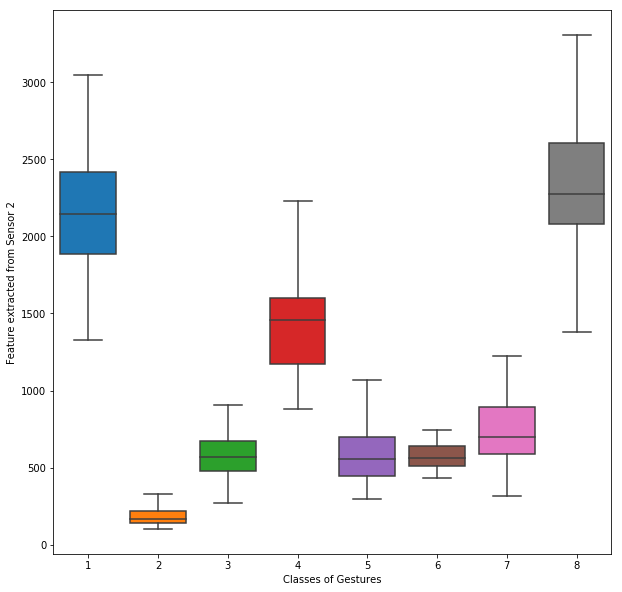

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

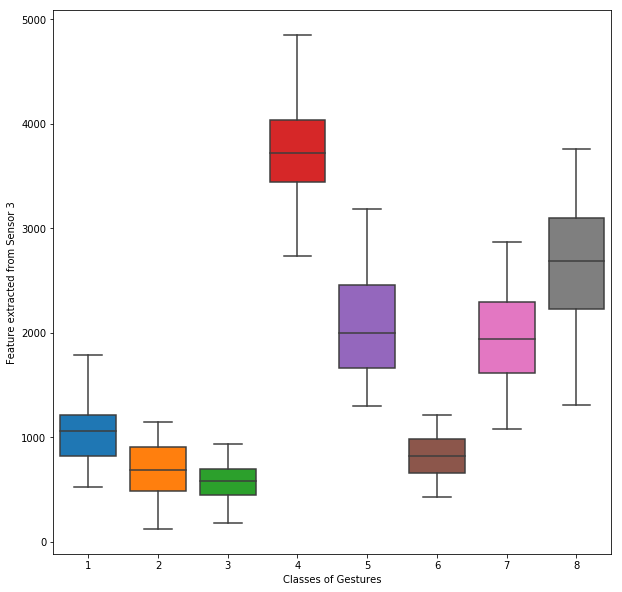

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

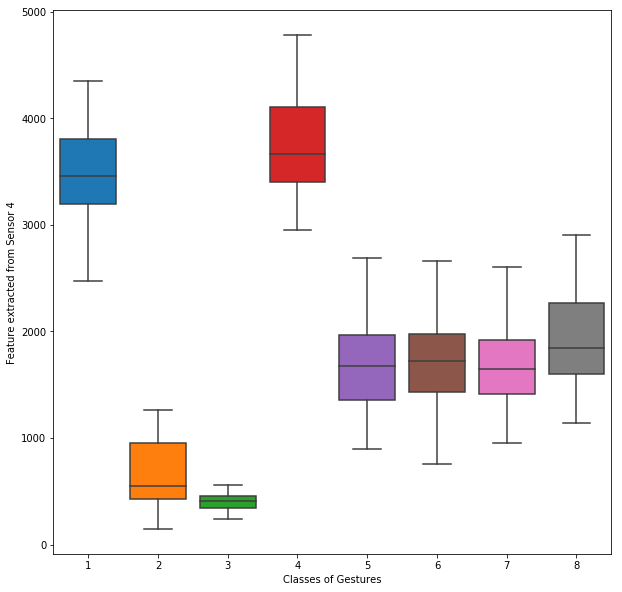

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

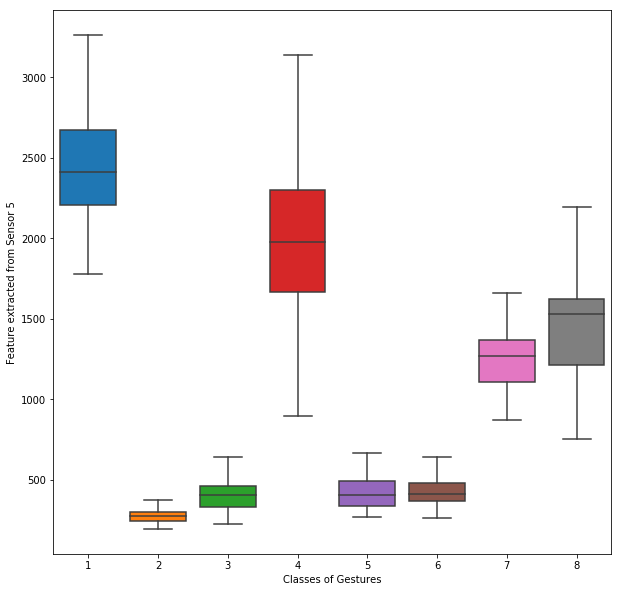

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

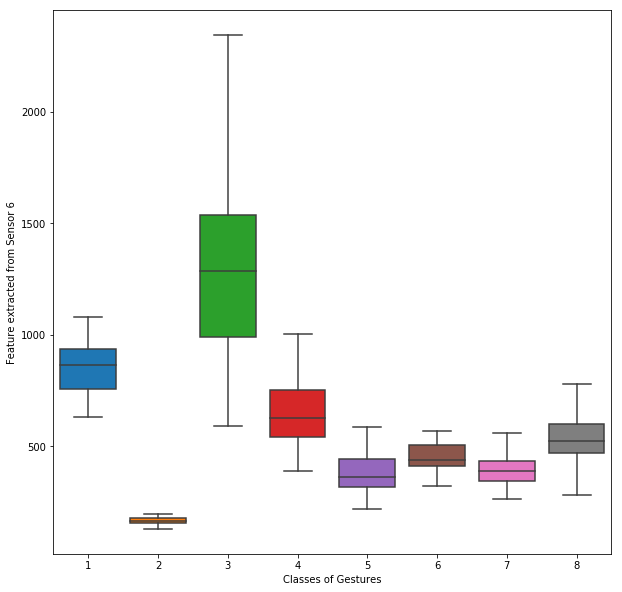

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

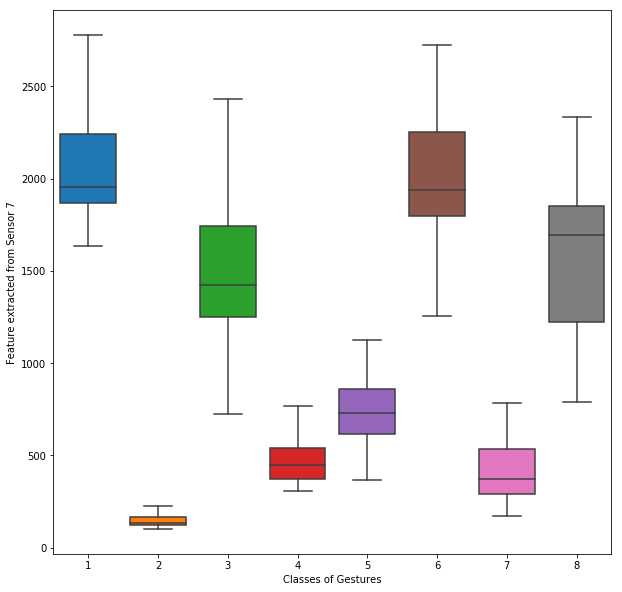

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

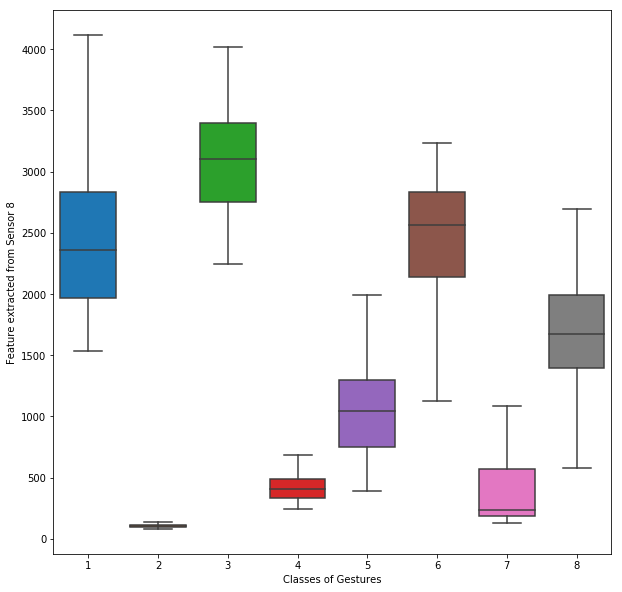

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.9625
--------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 20, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
           

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97142857 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02857143 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


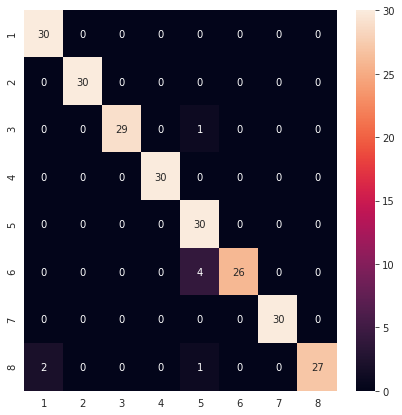

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.6000000000000005, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=30,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'C': 1.6000000000000005, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.96875
------------------------------------------

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97619048 0.9952381
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02380952 0.0047619
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


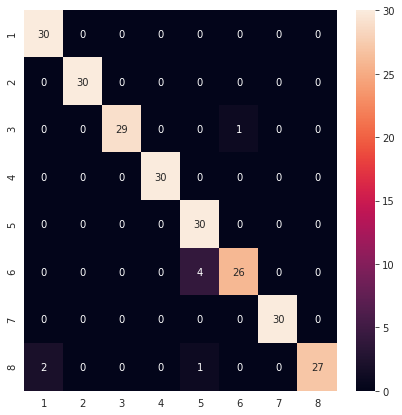

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2454.295948266983
--------------------------------------------------
94.58333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.96666667 1.         0.96666667 1.         0.93333333 0.86666667
 0.93333333 0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         0.9952381  0.97142857 0.9952381
 1.         0.99047619]
---------------------------------------------------------------
FPR
[0.00952381 0.0047619  0.         0.0047619  0.02857143 0.0047619
 0.         0.00952381]
---------------------------------------------------------------
FNR
[0.03333333 0.         0.03333333 0.         0.06666667 0.13333333
 0.06666667 0.1       ]
---------------------------------------------------------------
Confusion Matrix


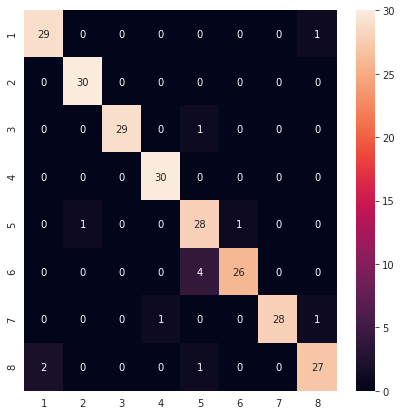

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


Time taken in seconds to train the model :  499.9573447704315
--------------------------------------------------
96.25
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.96666667 1.         1.         1.         1.         0.86666667
 0.96666667 0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         1.         0.98095238 0.9952381
 1.         0.9952381 ]
---------------------------------------------------------------
FPR
[0.00952381 0.0047619  0.         0.         0.01904762 0.0047619
 0.         0.0047619 ]
---------------------------------------------------------------
FNR
[0.03333333 0.         0.         0.         0.         0.13333333
 0.03333333 0.1       ]
---------------------------------------------------------------
Confusion Matrix


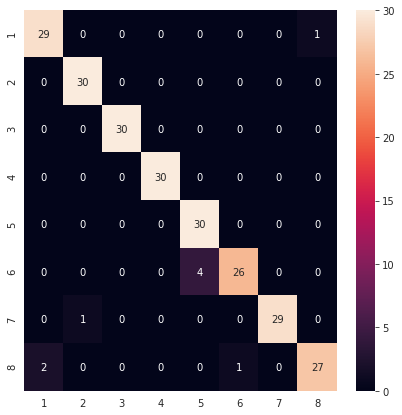

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [ ]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  105.57985305786133
--------------------------------------------------
95.0
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.96666667 1.         0.86666667 1.         0.93333333 0.9
 0.96666667 0.96666667]
---------------------------------------------------------------
TNR
[0.9952381  0.9952381  1.         0.9952381  0.98095238 0.98095238
 1.         0.9952381 ]


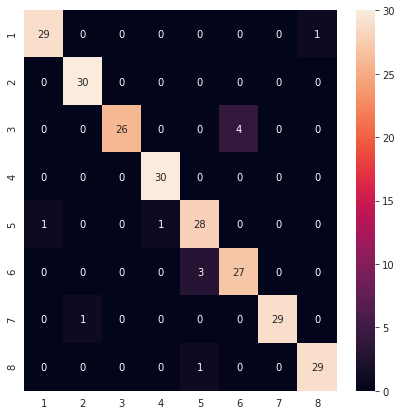

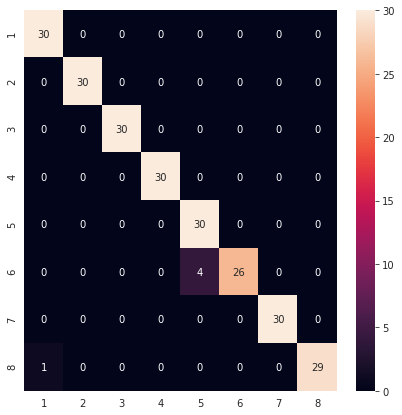

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## Average amplitude change feature extraction technique ##

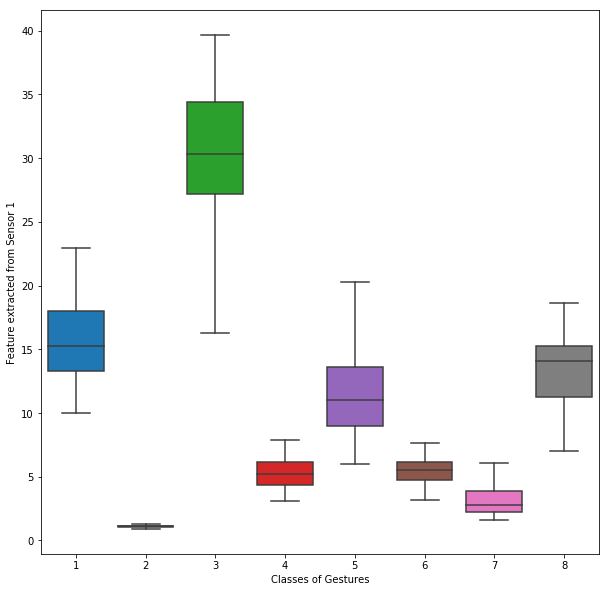

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

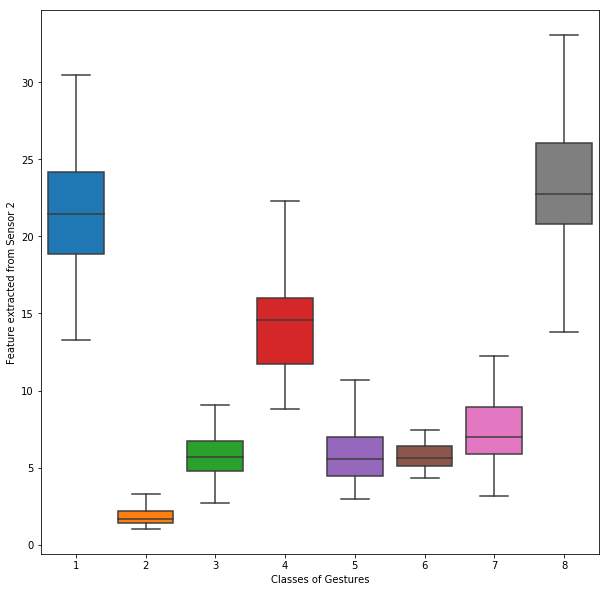

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

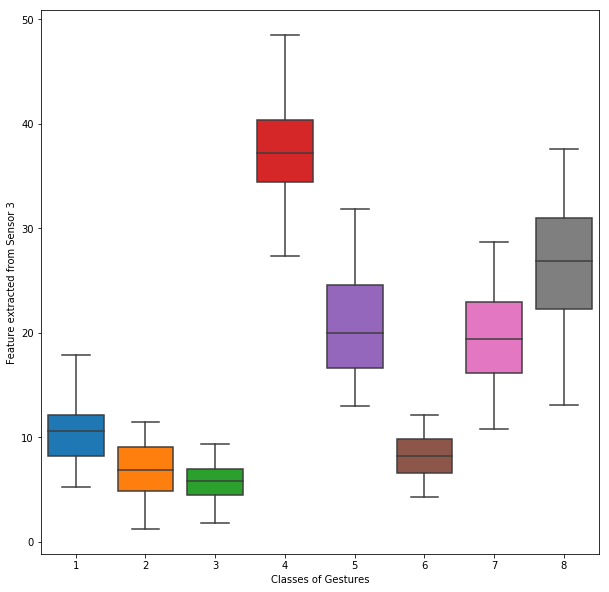

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

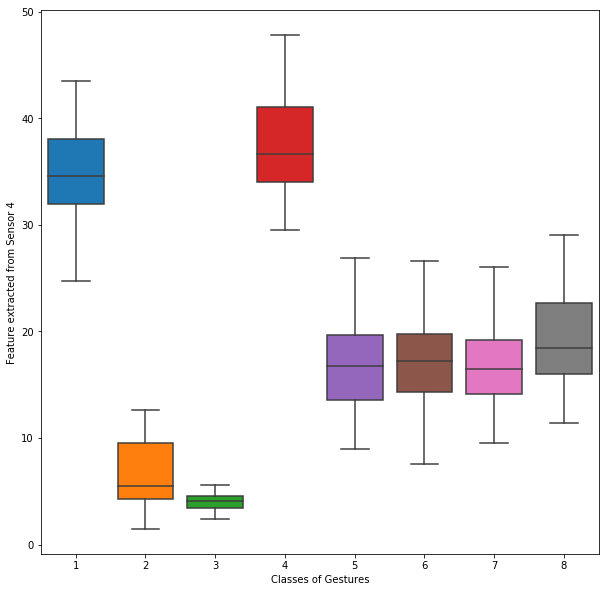

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

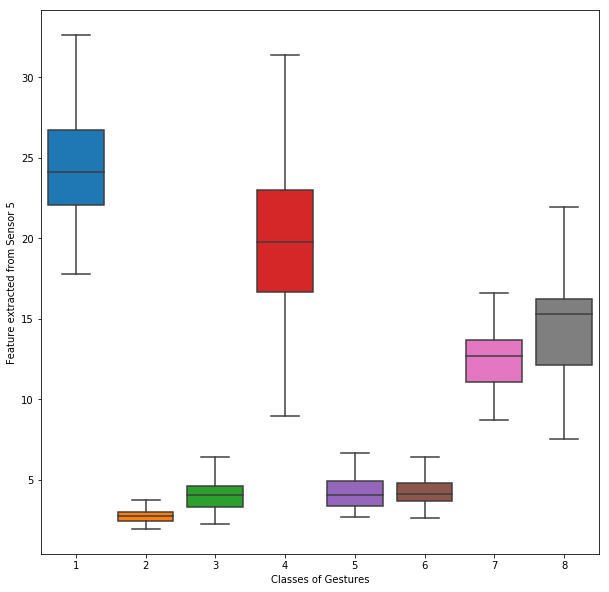

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

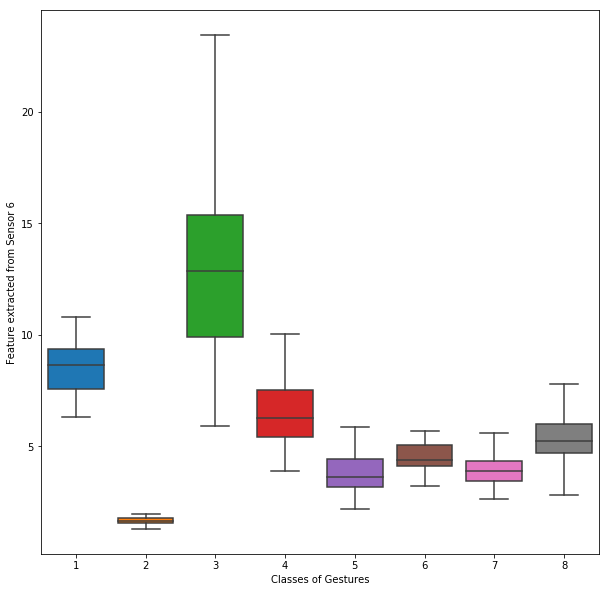

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

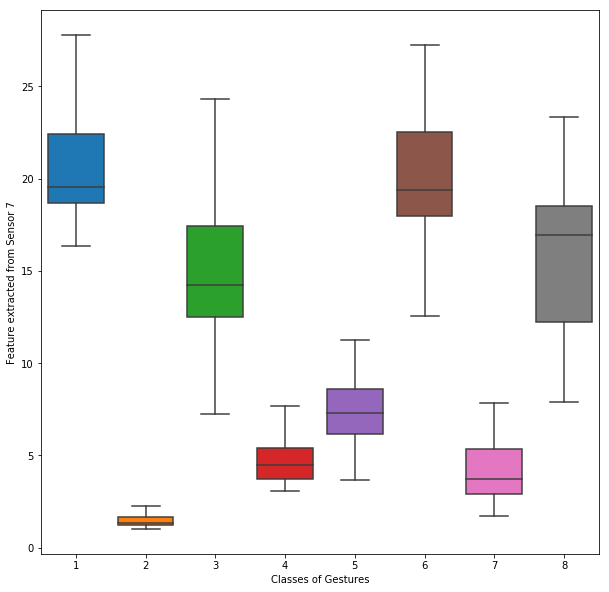

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

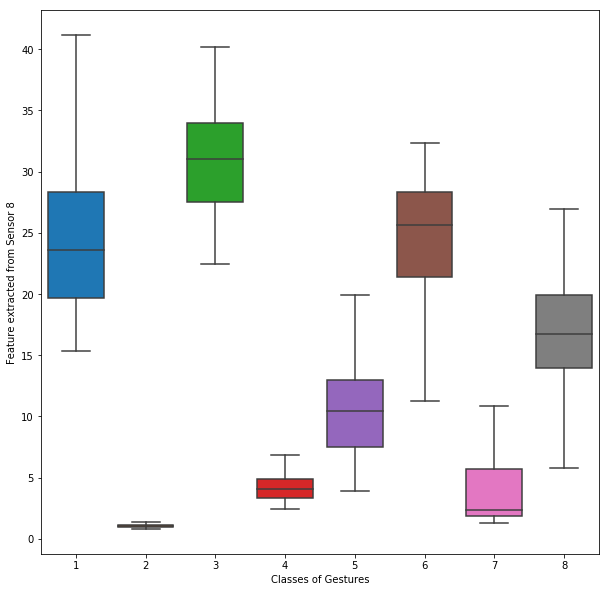

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.9625
--------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 20, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
           

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97142857 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02857143 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


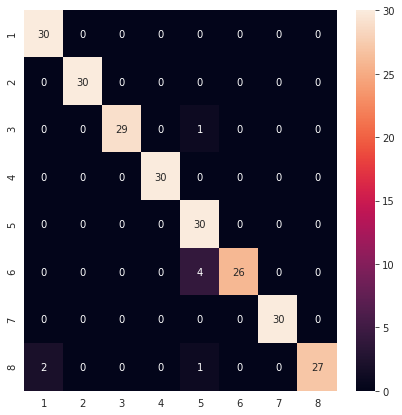

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.6000000000000005, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=30,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.975
--------------------------------------------------------------------------
Best parameters: {'C': 1.6000000000000005, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.96875
------------------------------------------

--------------------------------------------------
97.08333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


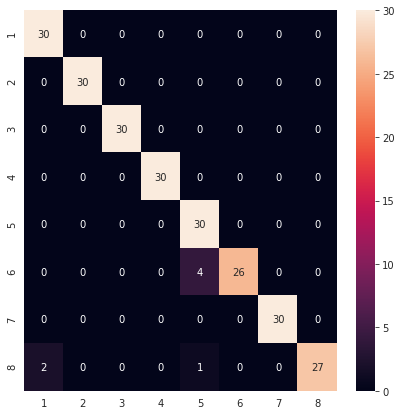

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2391.9989790916443
--------------------------------------------------
94.58333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.96666667 1.         0.96666667 1.         0.93333333 0.86666667
 0.93333333 0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         0.9952381  0.97142857 0.9952381
 1.         0.99047619]
---------------------------------------------------------------
FPR
[0.00952381 0.0047619  0.         0.0047619  0.02857143 0.0047619
 0.         0.00952381]
---------------------------------------------------------------
FNR
[0.03333333 0.         0.03333333 0.         0.06666667 0.13333333
 0.06666667 0.1       ]
---------------------------------------------------------------
Confusion Matrix


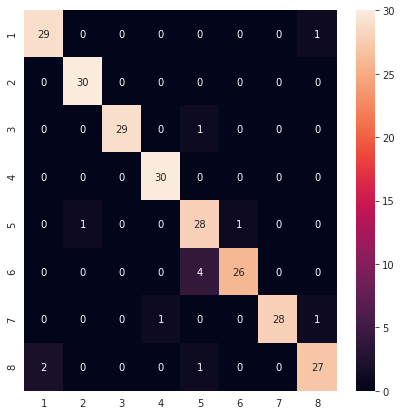

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


Time taken in seconds to train the model :  78.67427515983582
--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.96666667 0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 0.9952381  1.         1.         0.97619048 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.0047619  0.         0.         0.02380952 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.03333333 0.1       ]
---------------------------------------------------------------
Confusion Matrix


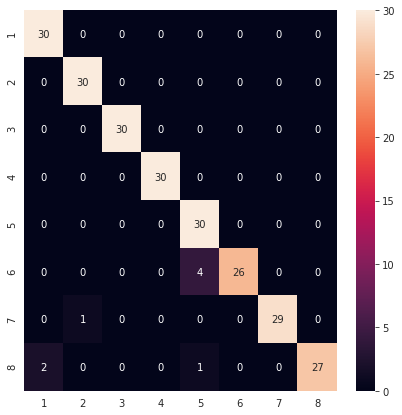

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


In [ ]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)
--------------------------------------------------
Time taken in seconds to train the model :  104.8001081943512
--------------------------------------------------
95.0
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.96666667 1.         0.86666667 1.         0.93333333 0.9
 0.96666667 0.96666667]
---------------------------------------------------------------
TNR
[0.9952381  0.9952381  1.         0.9952381  0.98095238 0.98095238
 1.         0.9952381 ]
-

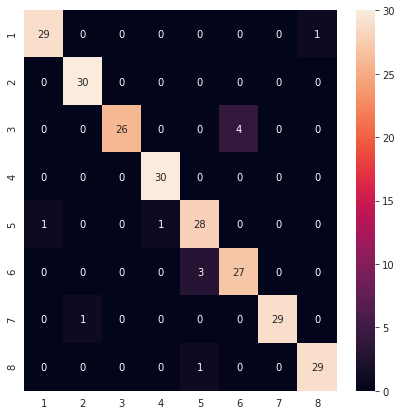

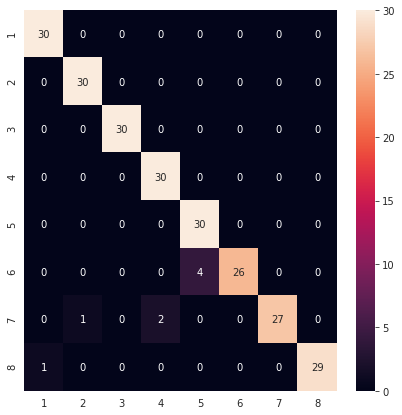

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print('--------------------------------------------------')
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

In [ ]:
## difference absolute standard deviation value feature extraction technique ##

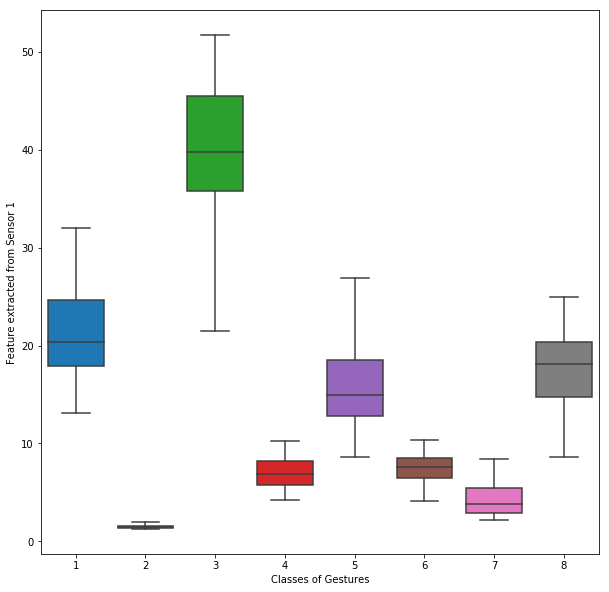

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,0], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 1')
plt.show()

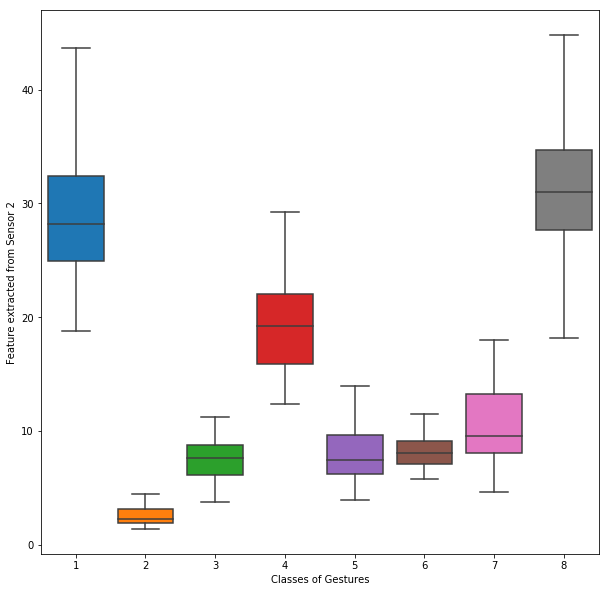

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,1], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 2')
plt.show()

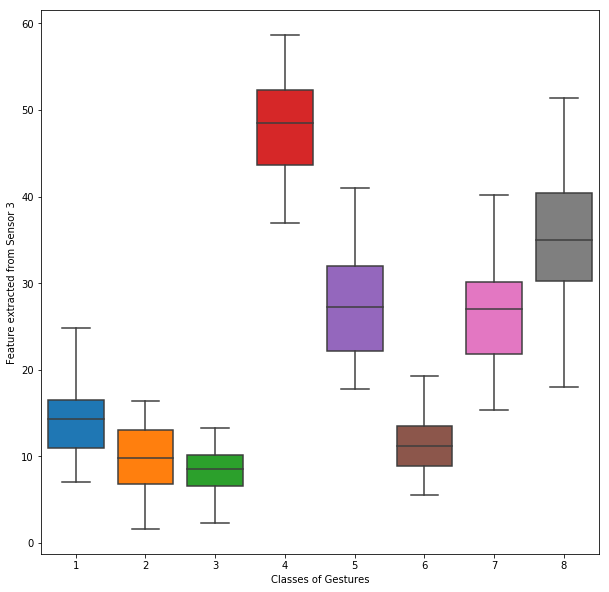

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,2], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 3')
plt.show()

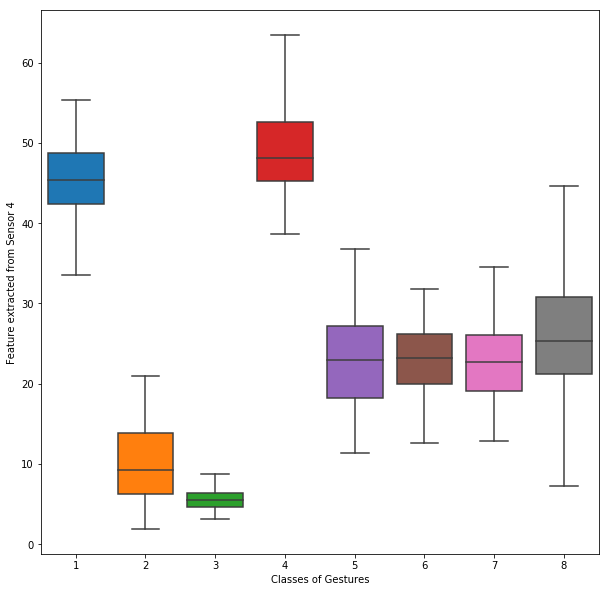

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,3], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 4')
plt.show()

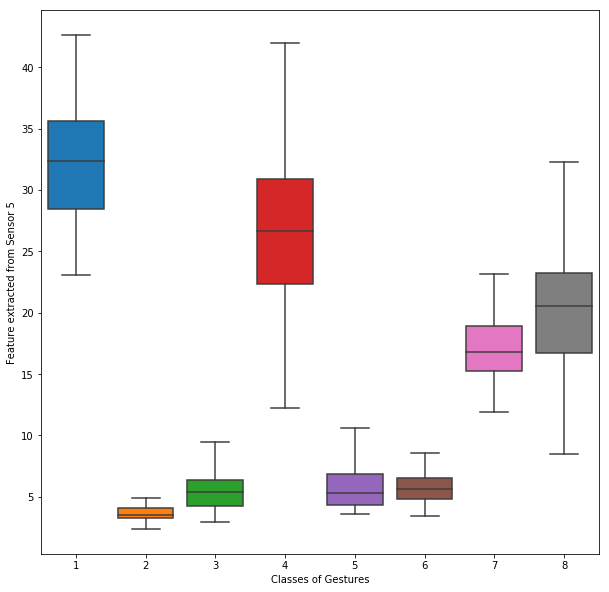

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,4], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 5')
plt.show()

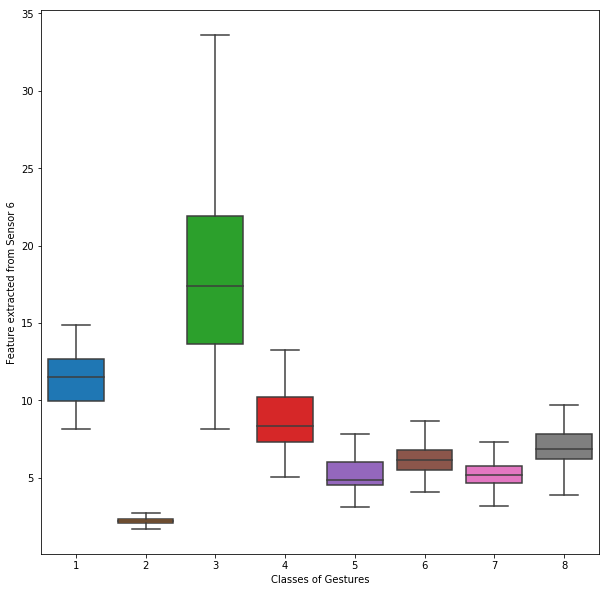

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,5], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 6')
plt.show()

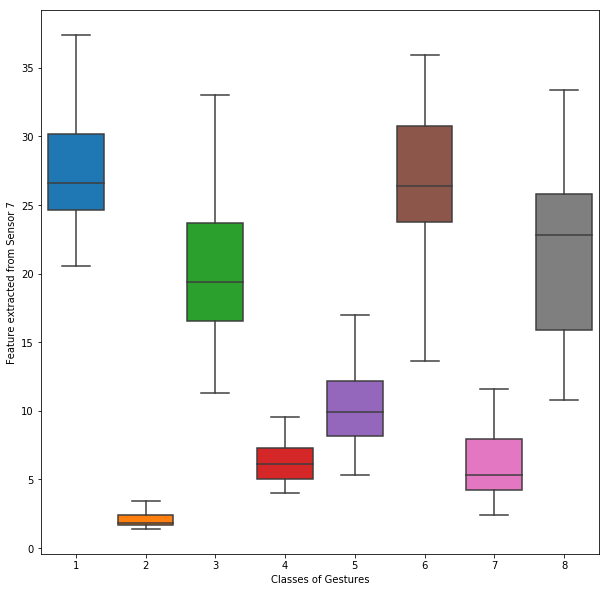

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,6], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 7')
plt.show()

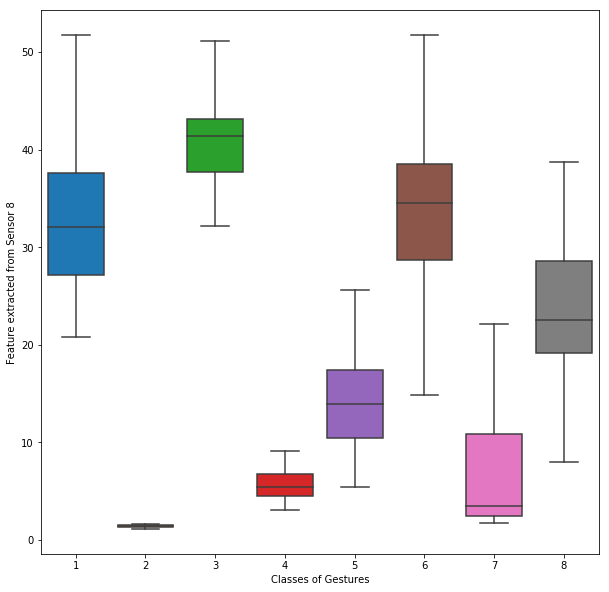

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data_final.iloc[:,8], y=data_final.iloc[:,7], showfliers=False, saturation=1)
plt.xlabel('Classes of Gestures')
plt.ylabel('Feature extracted from Sensor 8')
plt.show()

In [ ]:
# Create the parameter grid for stacking various classifiers
param_grid = [
    
    {
        #Random forest
        'bootstrap': [True, False],
        'max_depth': [40, 50, 60, 70, 80],
        #'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [10, 15, 20, 25],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [30]
    },
    
    {   
        #K Nearest Neighbours
        'n_neighbors':[5,6,7,9,11],
        'leaf_size':[1,3,5,7],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric':['euclidean', 'manhattan'] 
        
    },
    
    {
        #SVM
        'C': list(np.arange(1, 5, 0.01)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }    
] 

models_to_train = [RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)
    
endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime) 
print('==========================================================================') 
        
print('--------------Final Models--------------') 
print(final_models)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
--------------------------------------------------------------------------
Best estimator score: 0.9625
--------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 15, 'random_state': 30}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
           

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97142857 1.
 1.         1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02857143 0.
 0.         0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


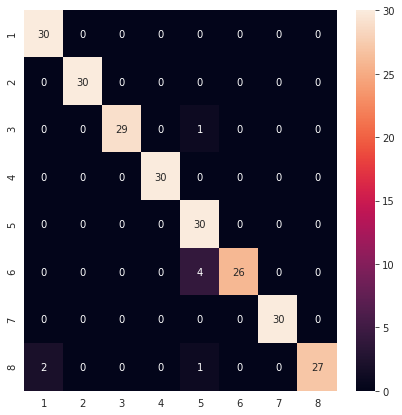

In [ ]:
#stacking various classifiers

estimators = [
    ('rf', final_models[0]),
    ('knn', final_models[1])                 
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Create the parameter grid for stacking multiple SVMs

param_grid = [
    
    {
        #SVM1
        'C': list(np.arange(1, 5, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }, 
    
    {
        #SVM2
        'C': list(np.arange(5, 10, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    },
    
     {
        #SVM3
        'C': list(np.arange(.01, 1, 0.1)),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'decision_function_shape': ['ovo', 'ovr'],
        'random_state' : [30]
    }
] 

models_to_train = [svm.SVC(), svm.SVC(), svm.SVC()]

final_models = []

startTime = time.time()

for i, model in enumerate(models_to_train):
    params = param_grid[i]
    
    clf = GridSearchCV(estimator=model, param_grid=params, cv=20, scoring = 'accuracy').fit(data_train, label_train)
    print('Best estimator:',clf.best_estimator_)
    print('--------------------------------------------------------------------------')
    print('Best estimator score:',clf.best_score_)
    print('--------------------------------------------------------------------------')
    print('Best parameters:',clf.best_params_)
    print('==========================================================================')
    final_models.append(clf.best_estimator_)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)
print('==========================================================================') 

print('--------------Final Models--------------') 
print(final_models)

Best estimator: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.96875
--------------------------------------------------------------------------
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 30}
Best estimator: SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True, tol=0.001,
    verbose=False)
--------------------------------------------------------------------------
Best estimator score: 0.95625
----------------------------------------------------------------------

--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.96666667 1.         1.         0.86666667
 1.         0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.97619048 1.
 0.9952381  1.        ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.02380952 0.
 0.0047619  0.        ]
---------------------------------------------------------------
FNR
[0.         0.         0.03333333 0.         0.         0.13333333
 0.         0.1       ]
---------------------------------------------------------------
Confusion Matrix


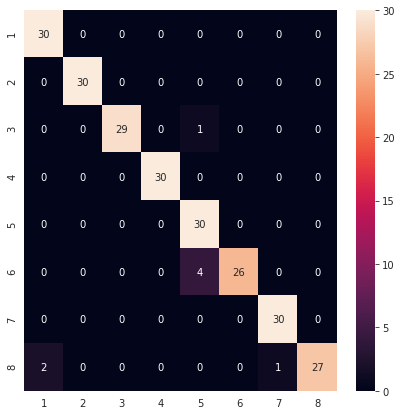

In [ ]:
# stacking SVMs

estimators = [
    ('SVM1', final_models[0]),
    ('SVM2', final_models[1])                    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator = final_models[2]
)

category_predicted = clf.fit(data_train, label_train).predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

Time taken in seconds to train the model :  2378.8977880477905
--------------------------------------------------
95.41666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[0.93333333 1.         0.96666667 1.         0.96666667 0.86666667
 0.96666667 0.93333333]
---------------------------------------------------------------
TNR
[0.9952381  1.         1.         1.         0.97619048 0.9952381
 0.9952381  0.98571429]
---------------------------------------------------------------
FPR
[0.0047619  0.         0.         0.         0.02380952 0.0047619
 0.0047619  0.01428571]
---------------------------------------------------------------
FNR
[0.06666667 0.         0.03333333 0.         0.03333333 0.13333333
 0.03333333 0.06666667]
---------------------------------------------------------------
Confusion Matrix


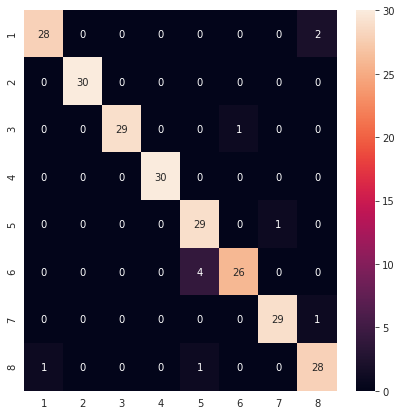

In [ ]:
# Bagging Decision Trees

param_grid = [
    
    {
        # Decision Tree and BaggingClassifier
        
        'base_estimator__max_depth': [40, 50, 60, 70, 80],
        #'base_estimator__max_features': [2, 3],
        'base_estimator__min_samples_leaf': [3, 4, 5],
        'base_estimator__min_samples_split': [8, 10, 12],
        'base_estimator__criterion' : ['gini', 'entropy'],
        'base_estimator__random_state' : [30],
        'n_estimators': [9, 13, 17, 21],
        'max_samples' : [0.5, 0.25, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)


Time taken in seconds to train the model :  76.75626802444458
--------------------------------------------------
96.66666666666667
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         1.         1.         1.         0.86666667
 0.96666667 0.9       ]
---------------------------------------------------------------
TNR
[0.99047619 1.         1.         1.         0.98095238 1.
 0.9952381  0.9952381 ]
---------------------------------------------------------------
FPR
[0.00952381 0.         0.         0.         0.01904762 0.
 0.0047619  0.0047619 ]
---------------------------------------------------------------
FNR
[0.         0.         0.         0.         0.         0.13333333
 0.03333333 0.1       ]
---------------------------------------------------------------
Confusion Matrix


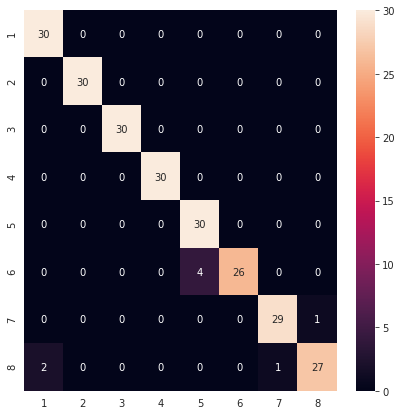

In [ ]:
# Bagging SVMs

param_grid = [
    
    {
        # SVM and BaggingClassifier
        
        'base_estimator__C': list(np.arange(1, 3, 0.2)),
        #'base_estimator__gamma': ['scale', 'auto'],
        #'base_estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'base_estimator__kernel': ['sigmoid', 'linear'],
        'base_estimator__decision_function_shape': ['ovo', 'ovr'],
        'base_estimator__random_state' : [30],
        'n_estimators': [5, 9, 13],
        'max_samples' : [0.5, 0.75, 1.0],
        'max_features': [0.75, 1.0],
        #'bootstrap': [True, False],
        #'bootstrap_features': [True, False],
        'random_state' : [30]
    },
  
] 

clf = GridSearchCV(BaggingClassifier(svm.SVC()),                             
                   param_grid, scoring = 'accuracy')

startTime = time.time()

clf.fit(data_train, label_train)

endTime = time.time()
totalTime = (endTime - startTime)/60
print("Time taken in minutes to train the model : ", totalTime)

print('==========================================================================') 

print('Best estimator:',clf.best_estimator_)
print('--------------------------------------------------------------------------')
print('Best estimator score:',clf.best_score_)
print('--------------------------------------------------------------------------')
print('Best parameters:',clf.best_params_)

print('==========================================================================')


category_predicted = clf.predict(data_test)

print('--------------------------------------------------')
acc = accuracy_score(label_test, category_predicted) * 100
print(acc)
print('--------------------------------------------------')

calculate_metrics(label_test, category_predicted)

In [ ]:
# Parameter grid for XGBoost
# XGBoost Parameters (official guide) : https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

param_grid = [
    
                {
                      # parameters for gbtree
                      
                      'booster' : ['gbtree'],  
                      #'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['multi:softmax'],
                      #'num_class' : [8],  
                      'learning_rate': [0.3, 0.05], #so called `eta` value
                      'max_depth': [4, 6, 8, 10], #choose a smaller max_depth
                      #'min_child_weight': [11],
                      #'silent': [1],
                      #'subsample': [0.8],
                      #'colsample_bytree': [0.7],
                      'n_estimators': [201, 501, 1001], #number of trees, choose a smaller number of estimators
                      #'missing':[-999],
                      'seed': [30]
              
                  },
    
                  {
                      
                      # parameters for gblinear
                      
                      'booster' : ['gblinear'], 
                      'reg_lambda' : list(np.arange(.1, 2, 0.1)),
                      'reg_alpha' : list(np.arange(.1, 2, 0.1))
                  }  
             ] 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=201, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30,
              silent=None, subsample=1, verbosity=1)
Time taken in seconds to train the model :  105.54078221321106
--------------------------------------------------
93.33333333333333
--------------------------------------------------
---------------------------------------------------------------
TPR
[1.         1.         0.86666667 0.96666667 0.96666667 0.83333333
 0.96666667 0.86666667]
---------------------------------------------------------------
TNR
[0.98571429 1.         0.9952381  0.9952381  0.97142857 0.98095238
 0.9952381  1.        ]
--------------------------------

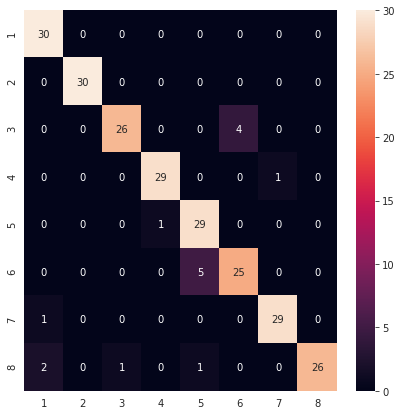

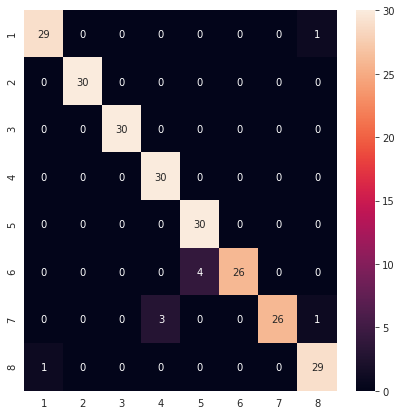

In [ ]:
for i in range(0,2):
    params = param_grid[i]
    
    startTime = time.time()
   
    clf = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, scoring = 'accuracy', cv=20).fit(data_train, label_train)
    print(clf.best_estimator_)
    #print(clf.estimator.get_params_)
    
    endTime = time.time()
    totalTime = (endTime - startTime)/60
    print("Time taken in minutes to train the model : ", totalTime)

    category_predicted = clf.predict(data_test)

    print('--------------------------------------------------')
    acc = accuracy_score(label_test, category_predicted) * 100
    print(acc)
    print('--------------------------------------------------')

    calculate_metrics(label_test, category_predicted)
        
    print('==================================================================')

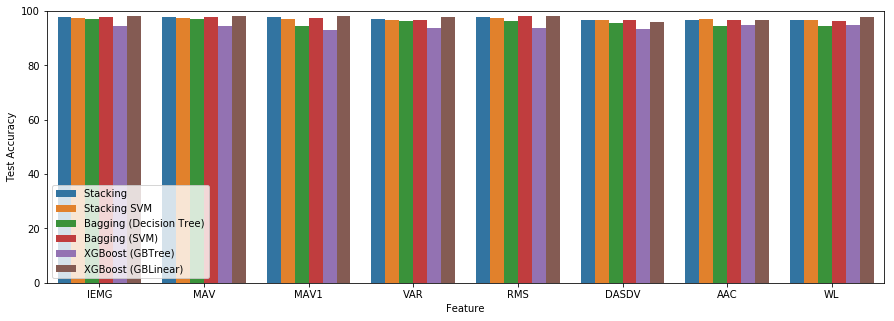

In [3]:
#Classification accuracy and training time plots

data = pd.read_csv('/home/hp/Myo_dataset/accuracy_time.csv')
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Feature", y="Test Accuracy", hue="Classifier", data=data)
ax.set(ylim=(0, 100))
plt.legend(loc='lower left')


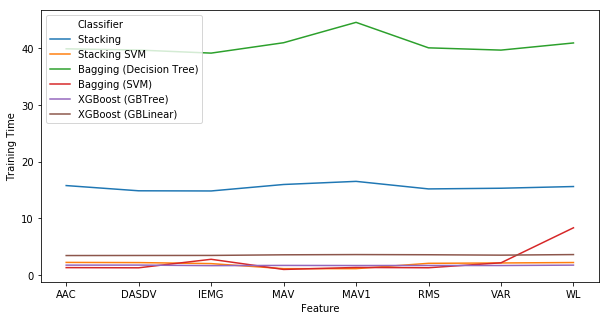

In [19]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="Feature", y="Training Time", hue="Classifier", data=data)
plt.legend(loc='upper left')

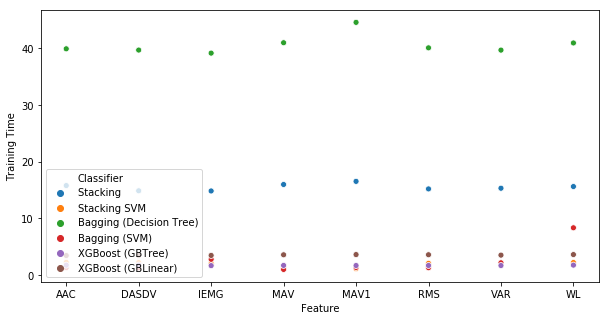

In [16]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="Feature", y="Training Time", hue="Classifier", data=data)
plt.legend(loc='lower left')

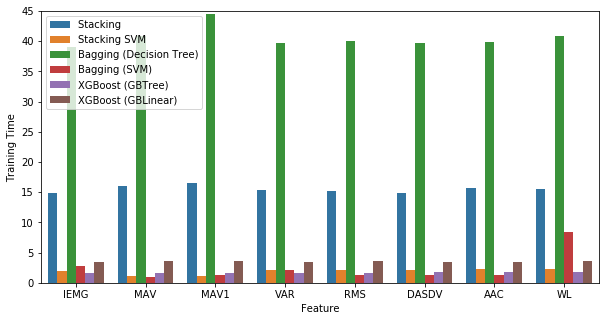

In [24]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Feature", y="Training Time", hue="Classifier", data=data)
ax.set(ylim=(0, 45))
plt.legend(loc='upper left')